## US National Census (Income)

*About this Dataset*

**US Adult Census** (1994) relates income to social factors: 

- *age*: continuous.
- *workclass*: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- *fnlwgt*: continuous.
- *education*: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- *education-num*: continuous.
- *marital-status*: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- *occupation*: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- *relationship*: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- *race*: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- *sex*: Female, Male.
- *capital-gain*: continuous.
- *capital-loss*: continuous.
- *hours-per-week*: continuous.
- *native-country*: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Each row is labelled as either having a salary greater than ">50K" or "<=50K".

Note: This Dataset was obtained from the UCI repository, it can be found on

https://archive.ics.uci.edu/ml/datasets/census+income, http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/

### Preprocessing

In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np
np.seterr(divide = 'ignore') 

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from scipy.stats import kstest

%run utils.py

path = Path(os.getcwd()).parent

columns = ['Age','Workclass','fnlgwt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Country','Above/Below 50K']

train = pd.read_csv(os.path.join(path, 'data/census_income/adult.data'), names=columns)
test = pd.read_csv(os.path.join(path, 'data/census_income/adult.test'), names=columns)
test = test.iloc[1:] # drop first row from test set

df = pd.concat([train, test])

In [2]:
df.replace(' >50K.', ' >50K', inplace=True)
df.replace(' <=50K.', ' <=50K', inplace=True)

df.dropna()
df.reset_index()

ctg = ['Workclass', 'Sex', 'Education', 'Marital Status', 
       'Occupation', 'Relationship', 'Race', 'Country'] # Categorical to Numerical

for c in ctg:
    df = pd.concat([df, pd.get_dummies(df[c], 
                                       prefix=c,
                                       dummy_na=False)], axis=1).drop([c],axis=1)

df_high = df[df['Above/Below 50K'] == " >50K"].copy(deep=True)
df_low = df[df['Above/Below 50K'] == " <=50K"].copy(deep=True)

### Experiment

- dropping only one instance at a time?
- how to find a good temperature value?
- https://www.sciencedirect.com/science/article/abs/pii/S0167865513000020


In [3]:
# Randomize data
df_low = df_low.reindex(np.random.permutation(df_low.index))
df_high = df_high.reindex(np.random.permutation(df_high.index))

rep = df.copy(deep=True)
non_rep = pd.concat([df_low.head(21000).copy(deep=True),
                     df_high.copy(deep=True)], sort=True)

print(rep['Above/Below 50K'].value_counts())
print(non_rep['Above/Below 50K'].value_counts())

rep['label'] = 0
non_rep['label'] = 1

 <=50K    37155
 >50K     11687
Name: Above/Below 50K, dtype: int64
 <=50K    21000
 >50K     11687
Name: Above/Below 50K, dtype: int64


## KS-Test and ROC-curve
The **Kolmogorov-Smirnov test** can be used to test the null hypothesis that the population distribution from which the data sample is drawn is a uniform distribution.
# MRS Algorithm

81529


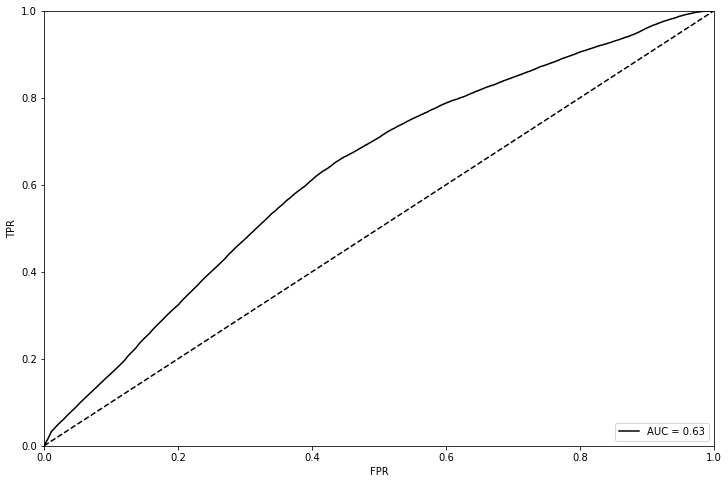

KstestResult(statistic=0.4663277480023899, pvalue=0.0)


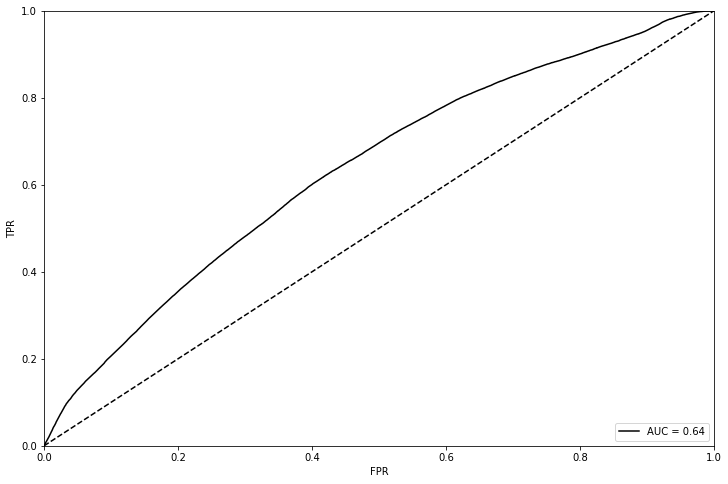

KstestResult(statistic=0.5213195361470971, pvalue=0.0)


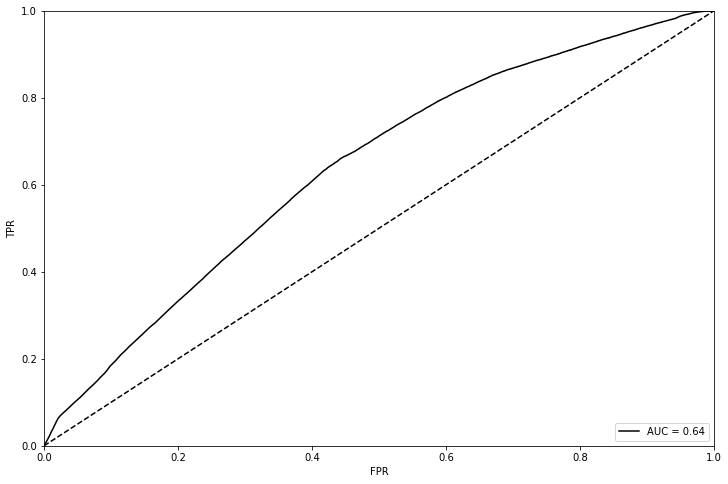

KstestResult(statistic=0.5236302215357541, pvalue=0.0)


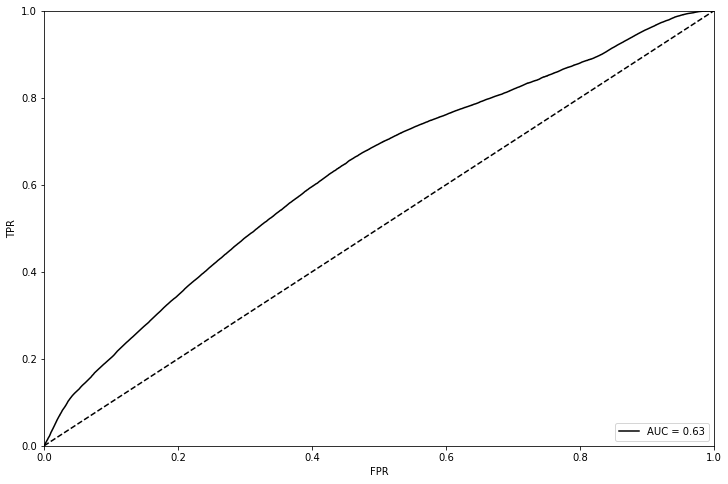

KstestResult(statistic=0.51420462994325, pvalue=0.0)


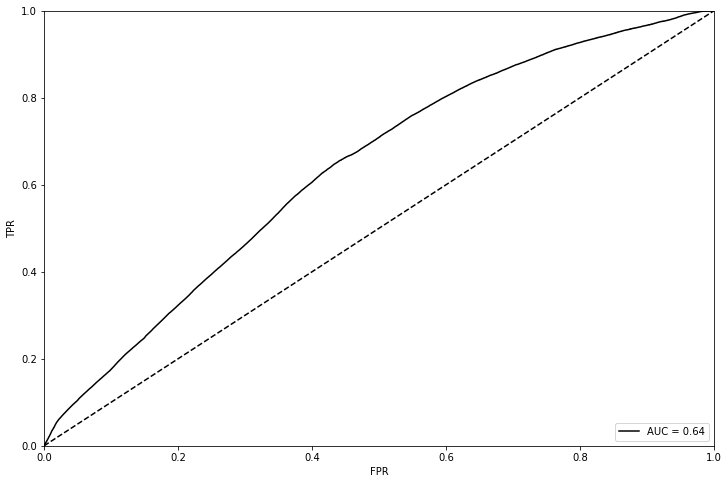

KstestResult(statistic=0.511443371183534, pvalue=0.0)


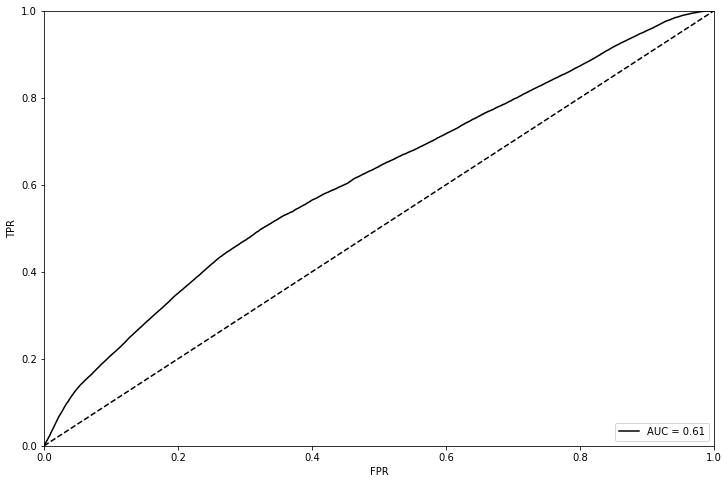

KstestResult(statistic=0.5203424916882275, pvalue=0.0)


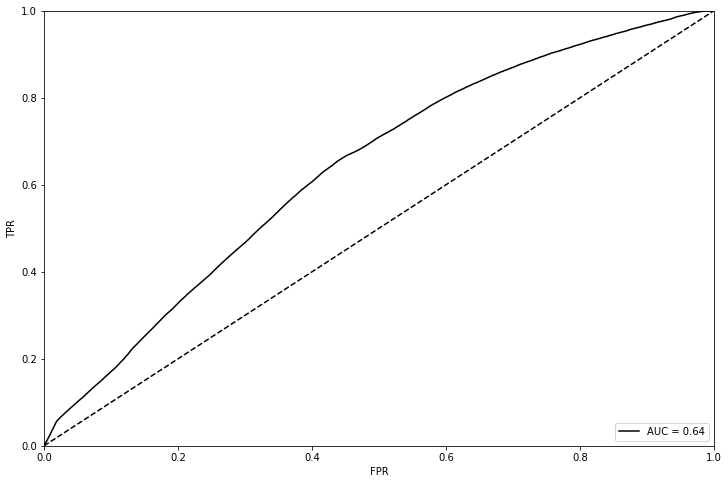

KstestResult(statistic=0.5091821776308326, pvalue=0.0)


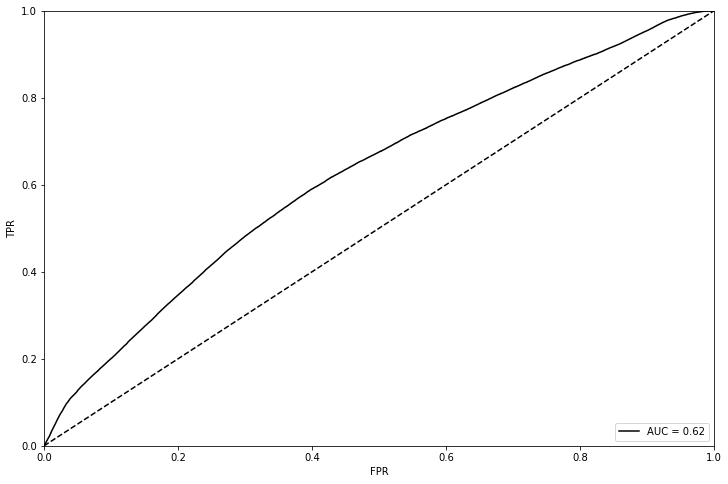

KstestResult(statistic=0.5171595602002186, pvalue=0.0)


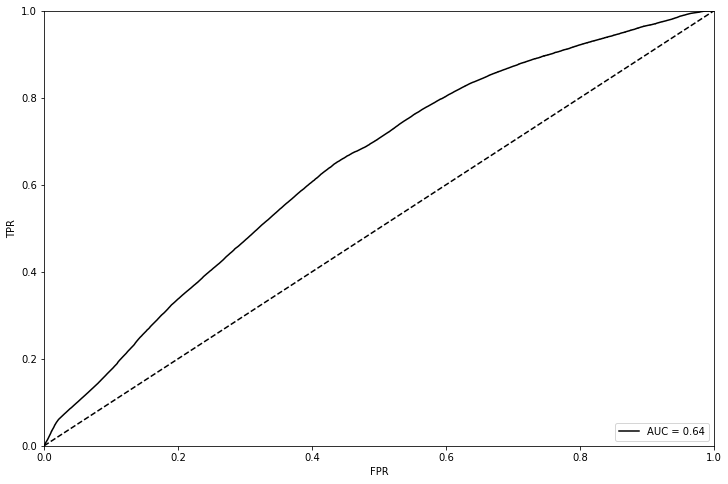

KstestResult(statistic=0.5130085688736968, pvalue=0.0)


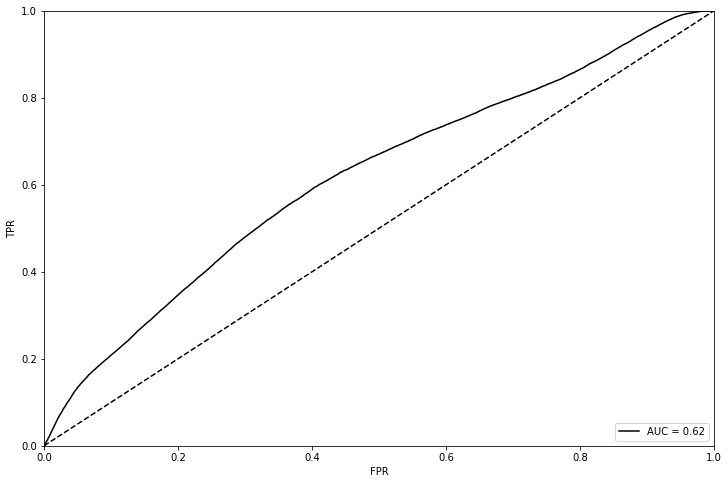

KstestResult(statistic=0.5238137266300208, pvalue=0.0)


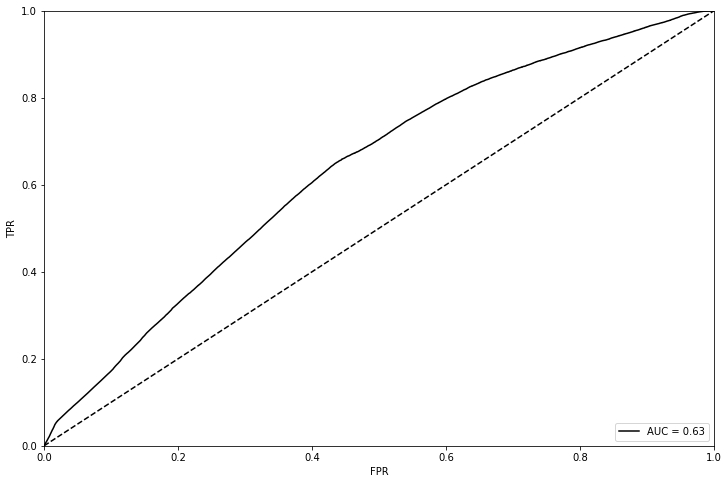

KstestResult(statistic=0.5176389234922373, pvalue=0.0)


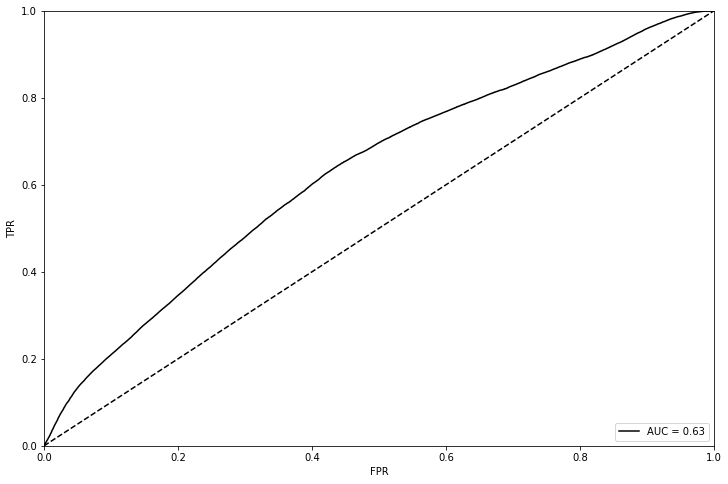

KstestResult(statistic=0.5159830948714391, pvalue=0.0)


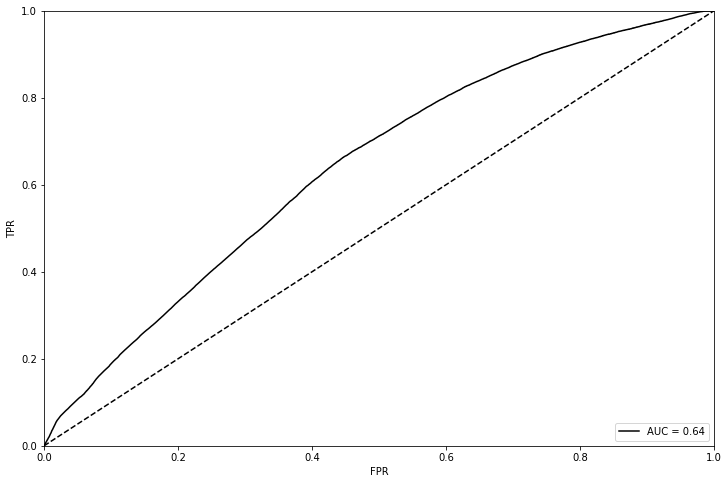

KstestResult(statistic=0.522396192170319, pvalue=0.0)


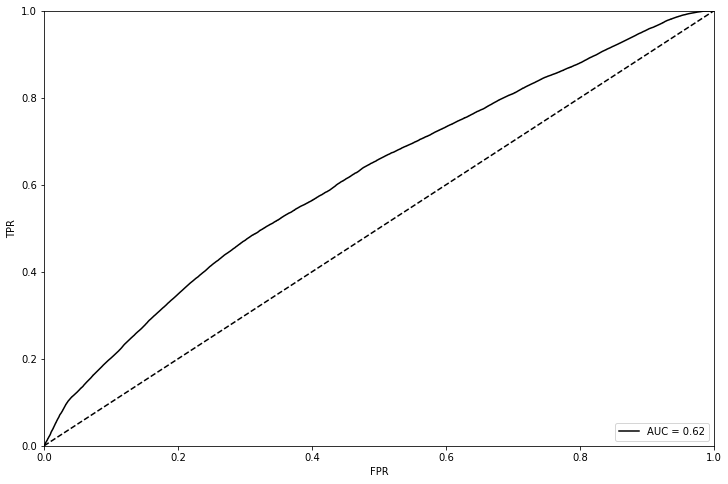

KstestResult(statistic=0.5161806605818636, pvalue=0.0)


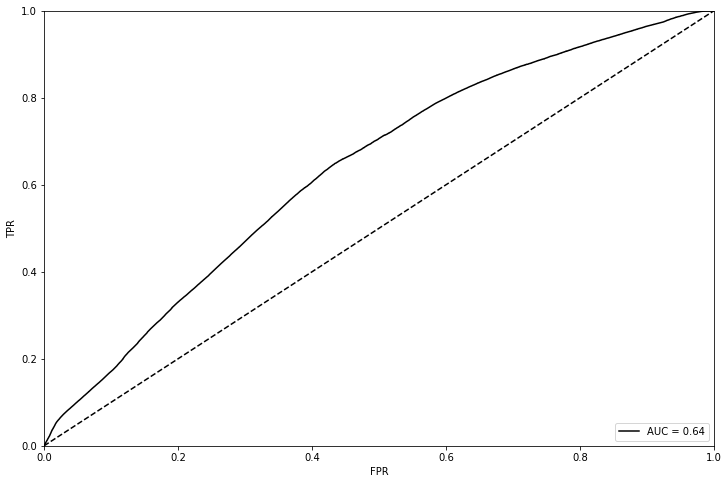

KstestResult(statistic=0.5031085198143191, pvalue=0.0)


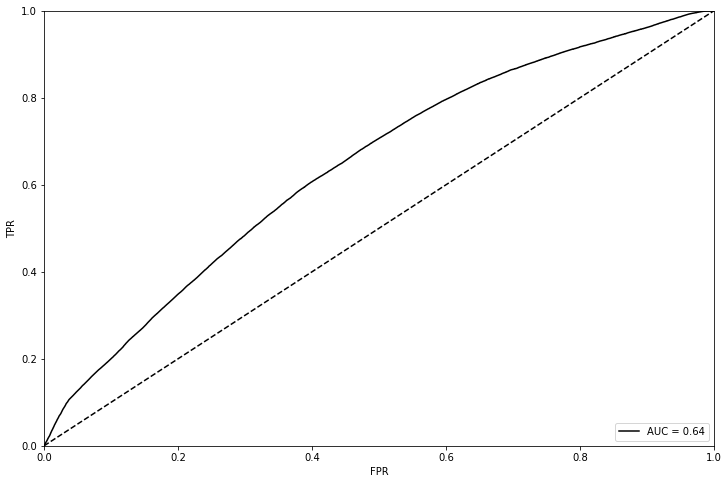

KstestResult(statistic=0.5185774711677288, pvalue=0.0)


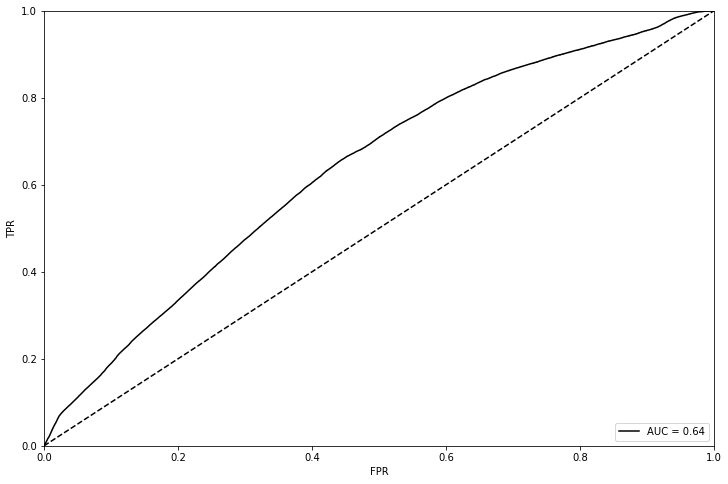

KstestResult(statistic=0.5189088440712472, pvalue=0.0)


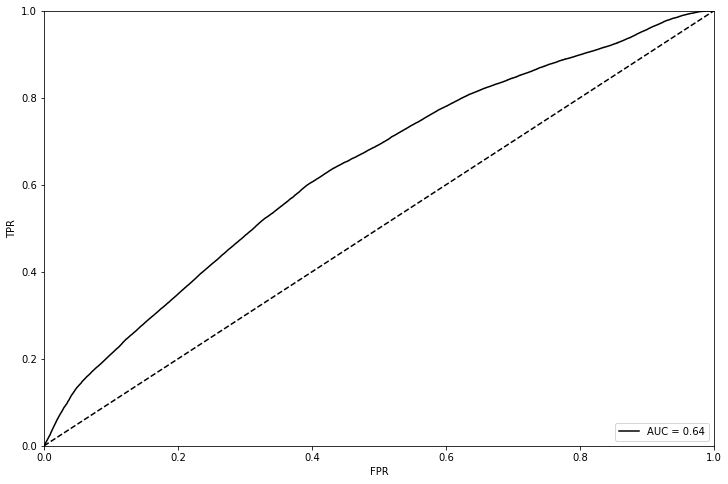

KstestResult(statistic=0.5138395069884671, pvalue=0.0)


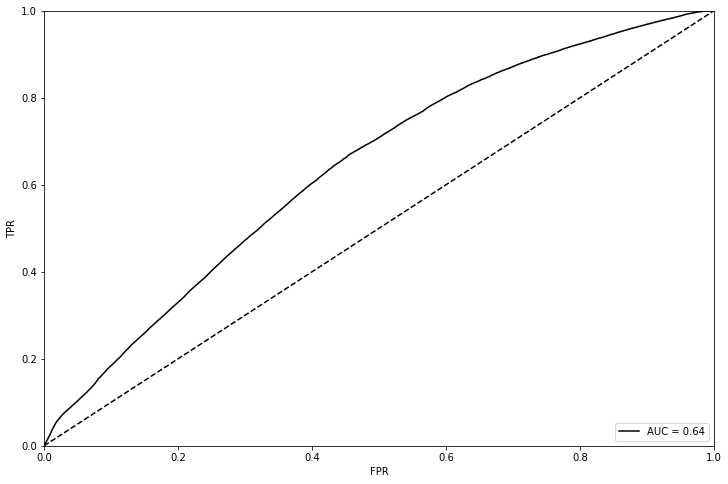

KstestResult(statistic=0.5282712230463568, pvalue=0.0)


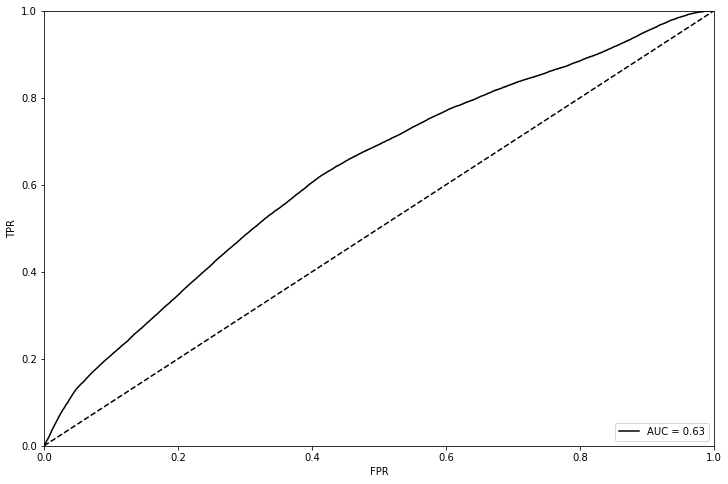

KstestResult(statistic=0.5225767563627315, pvalue=0.0)


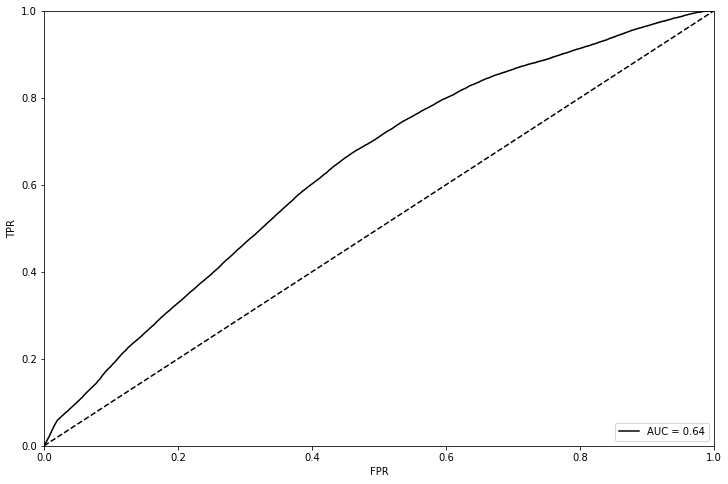

KstestResult(statistic=0.520508807760824, pvalue=0.0)


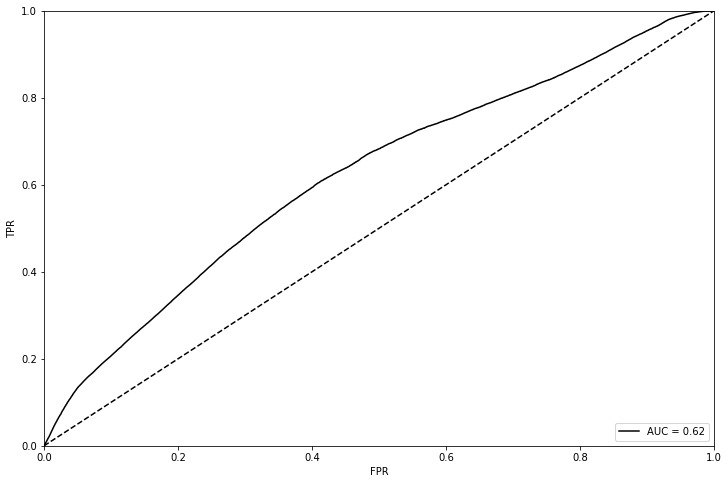

KstestResult(statistic=0.5164039323887339, pvalue=0.0)


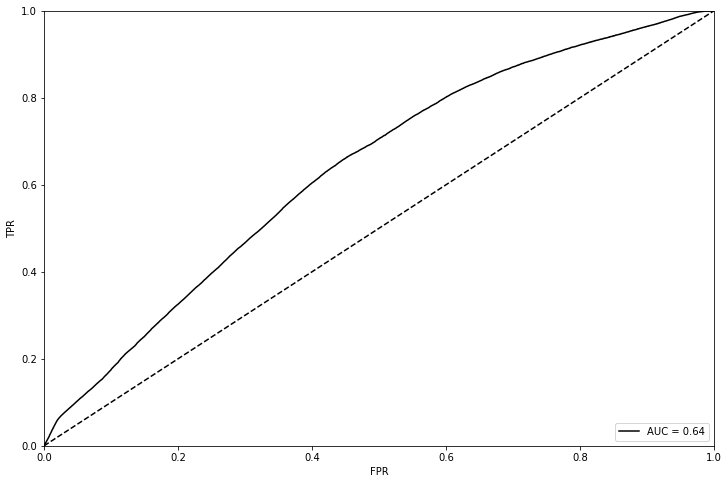

KstestResult(statistic=0.5139407943260871, pvalue=0.0)


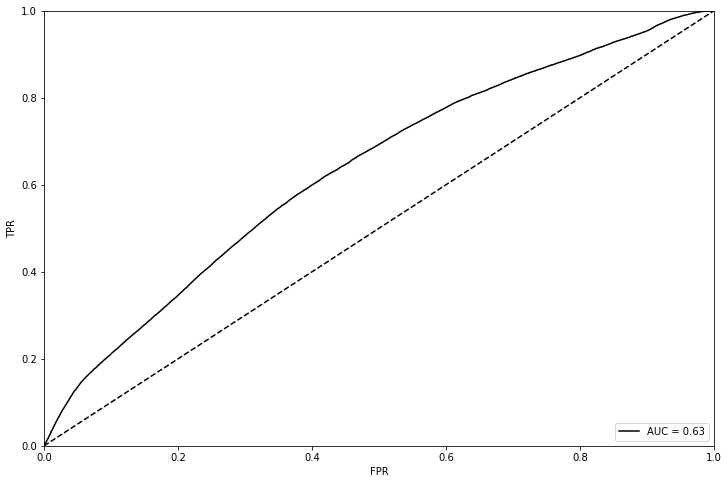

KstestResult(statistic=0.5255178754414922, pvalue=0.0)


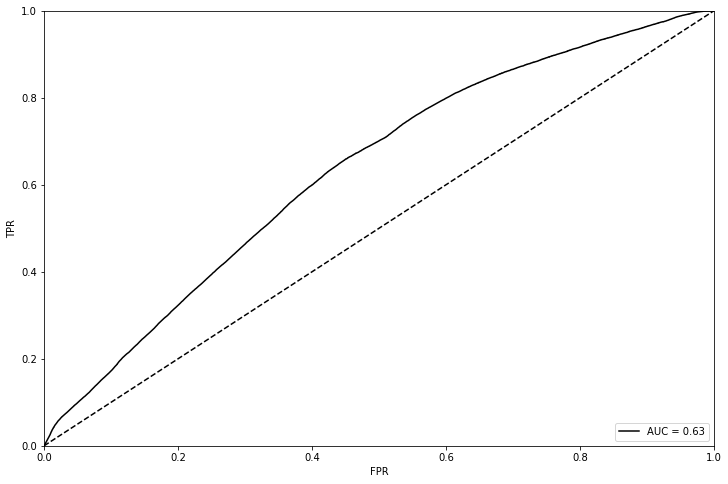

KstestResult(statistic=0.5222034874733156, pvalue=0.0)


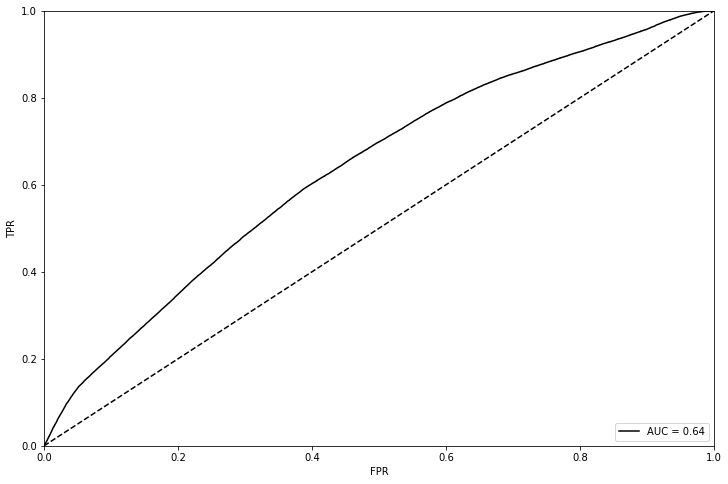

KstestResult(statistic=0.5175819687340936, pvalue=0.0)


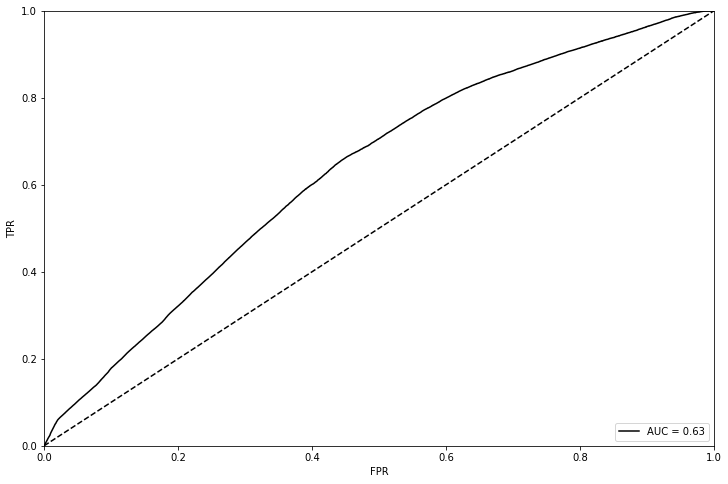

KstestResult(statistic=0.5168724969151001, pvalue=0.0)


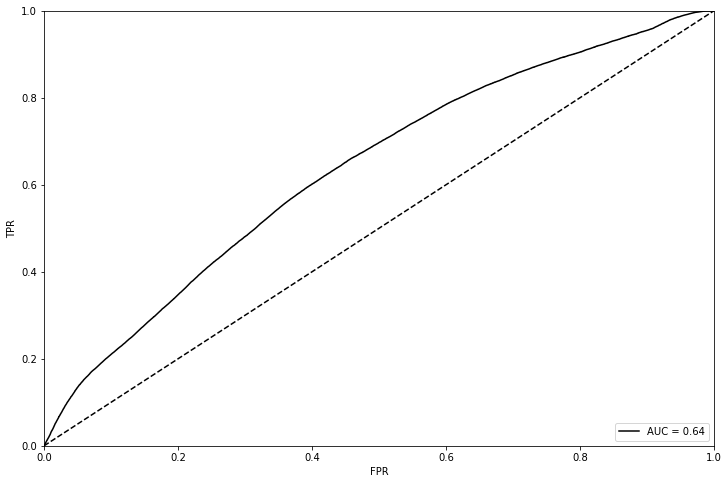

KstestResult(statistic=0.5260711256408764, pvalue=0.0)


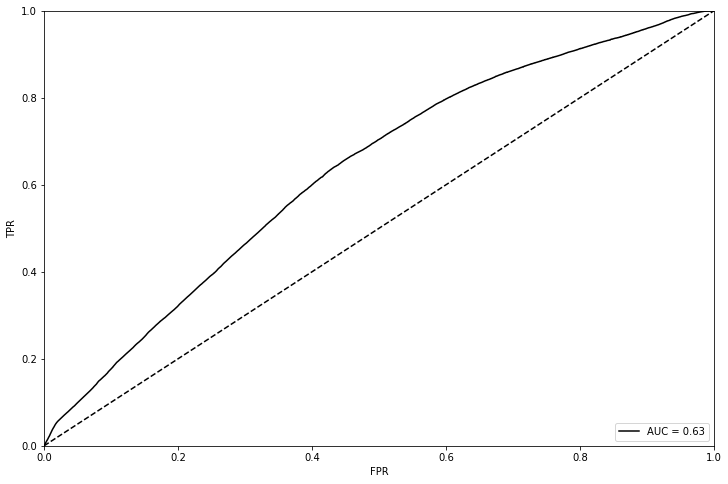

KstestResult(statistic=0.5106878043059814, pvalue=0.0)


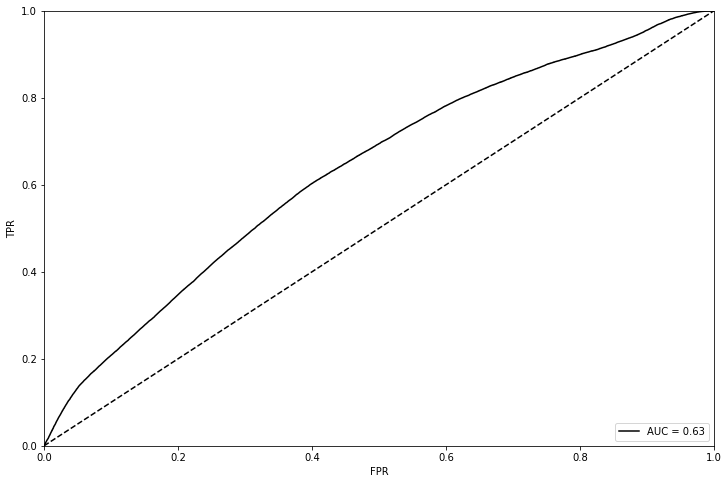

KstestResult(statistic=0.520421550569405, pvalue=0.0)


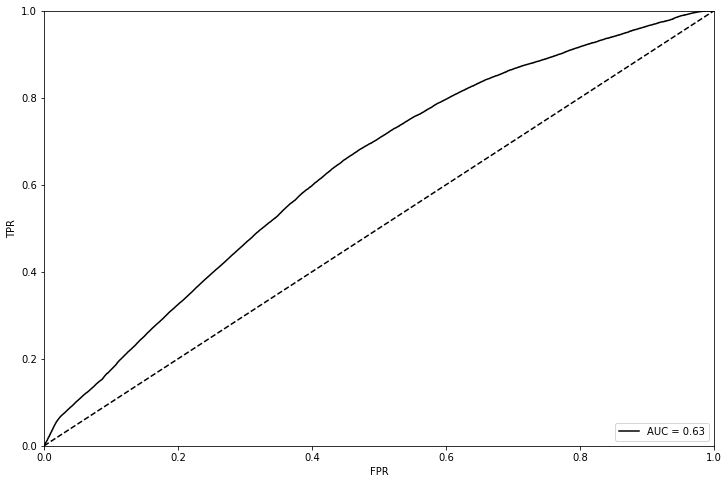

KstestResult(statistic=0.5252219842271557, pvalue=0.0)


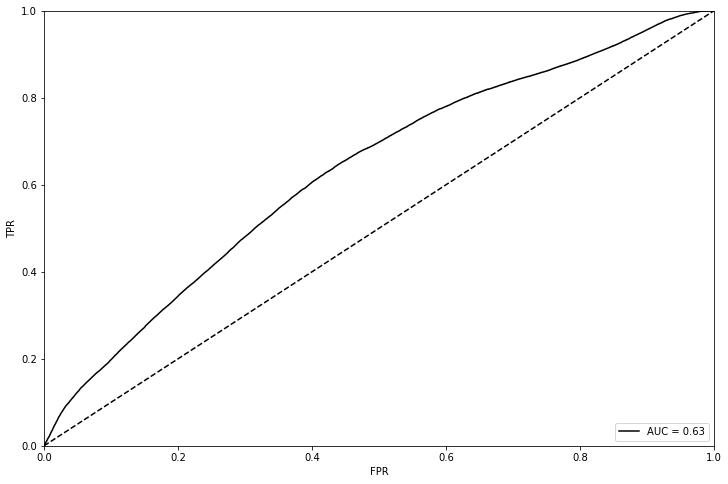

KstestResult(statistic=0.5164324461675689, pvalue=0.0)


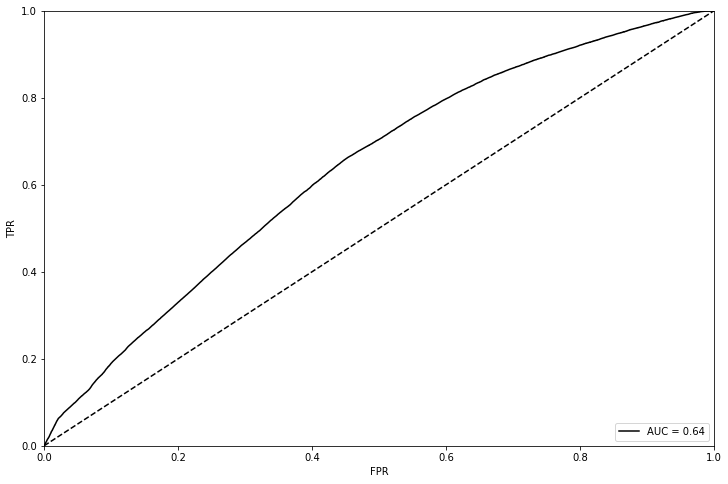

KstestResult(statistic=0.5253243490104197, pvalue=0.0)


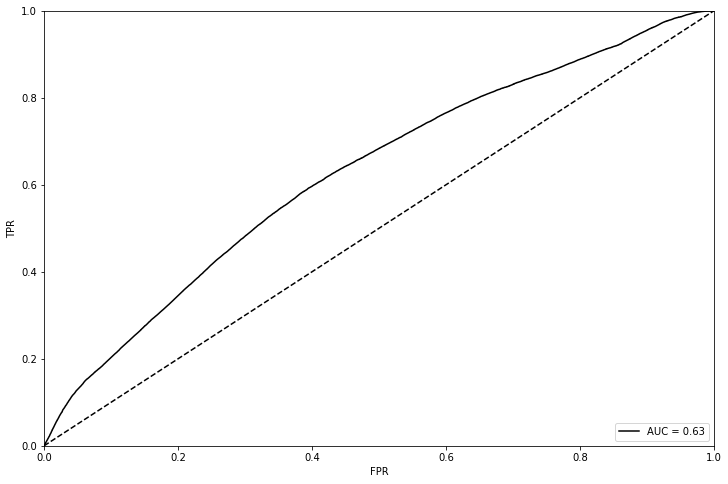

KstestResult(statistic=0.518304032816435, pvalue=0.0)


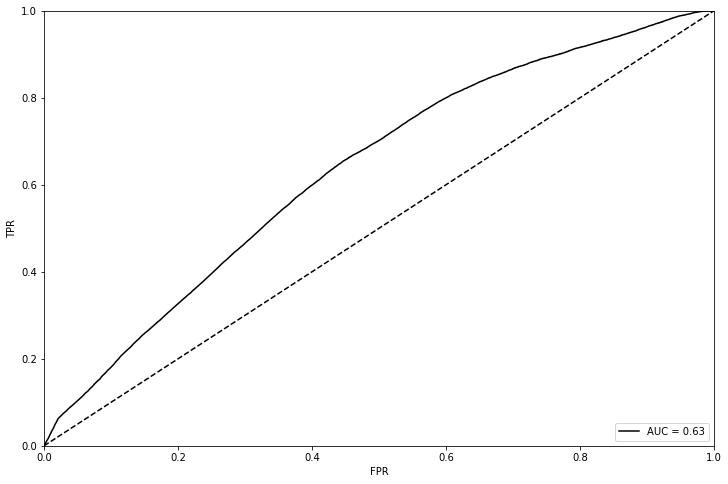

KstestResult(statistic=0.5168663042582546, pvalue=0.0)


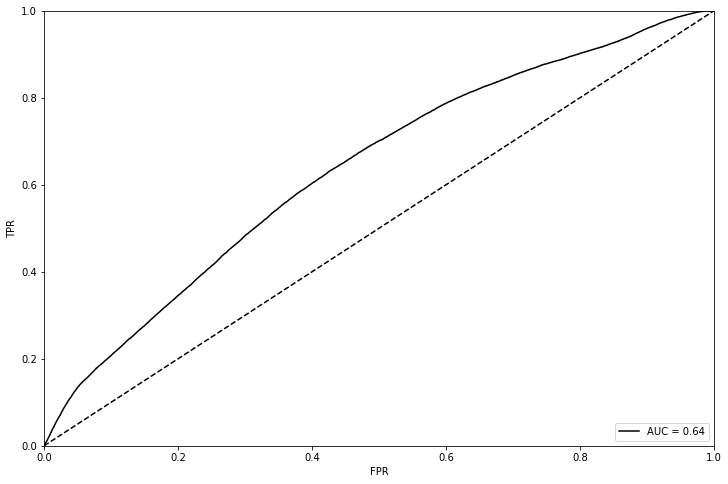

KstestResult(statistic=0.513876316283929, pvalue=0.0)


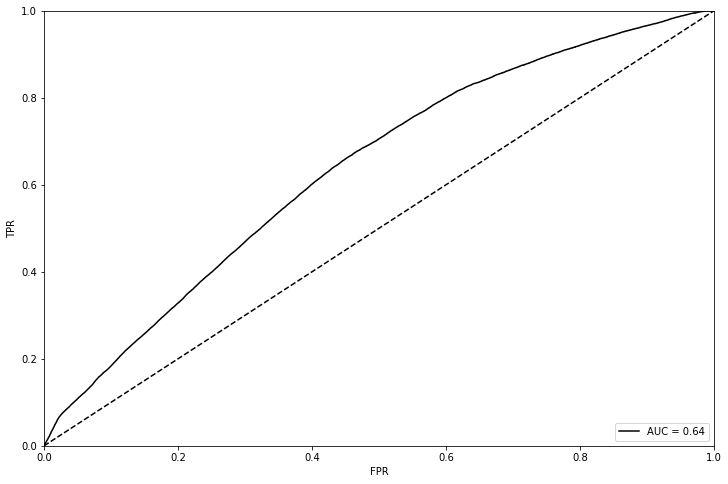

KstestResult(statistic=0.512014900513223, pvalue=0.0)


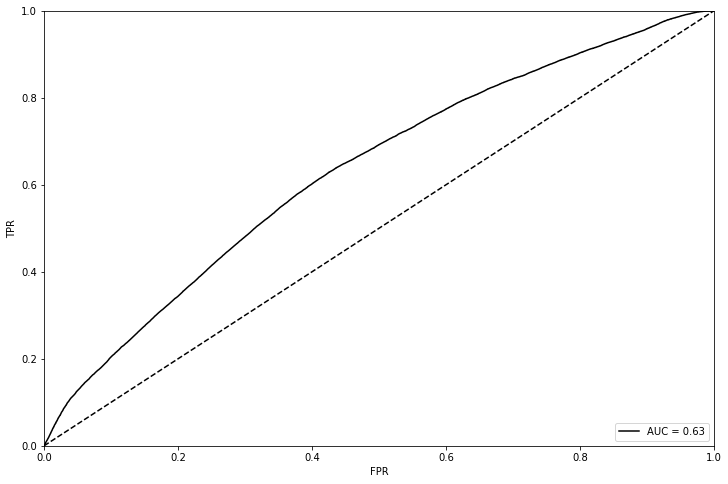

KstestResult(statistic=0.5160647116392568, pvalue=0.0)


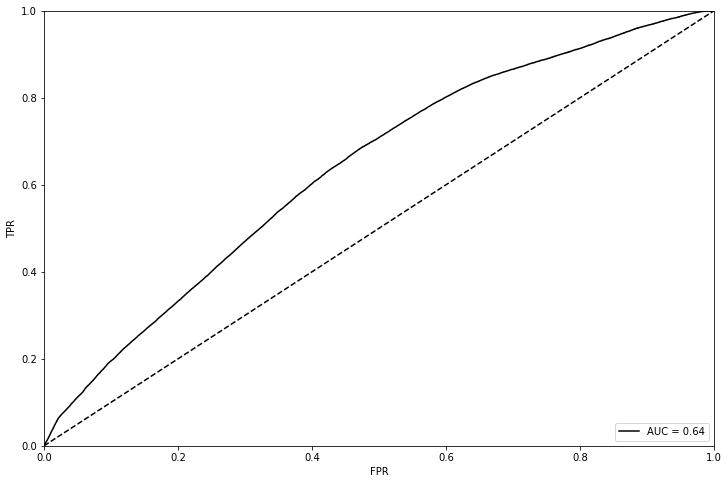

KstestResult(statistic=0.5148712581727141, pvalue=0.0)


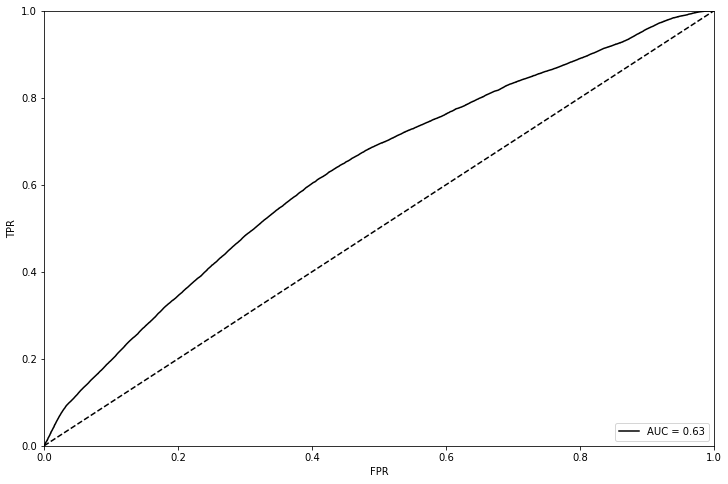

KstestResult(statistic=0.5154077431964083, pvalue=0.0)


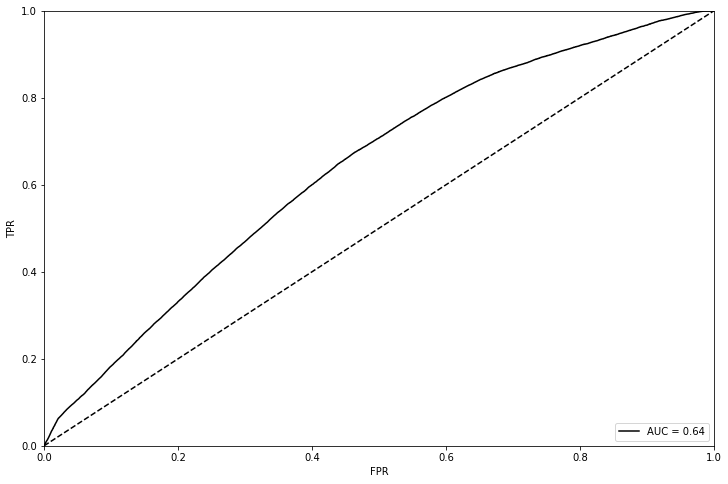

KstestResult(statistic=0.5228054996205062, pvalue=0.0)


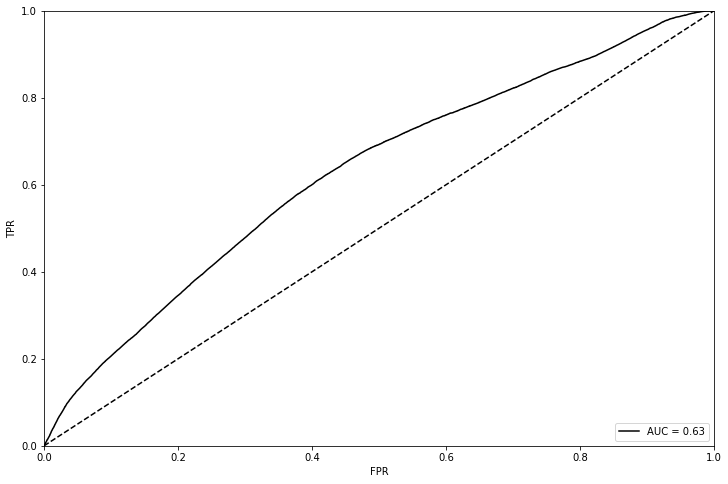

KstestResult(statistic=0.5073943678018347, pvalue=0.0)


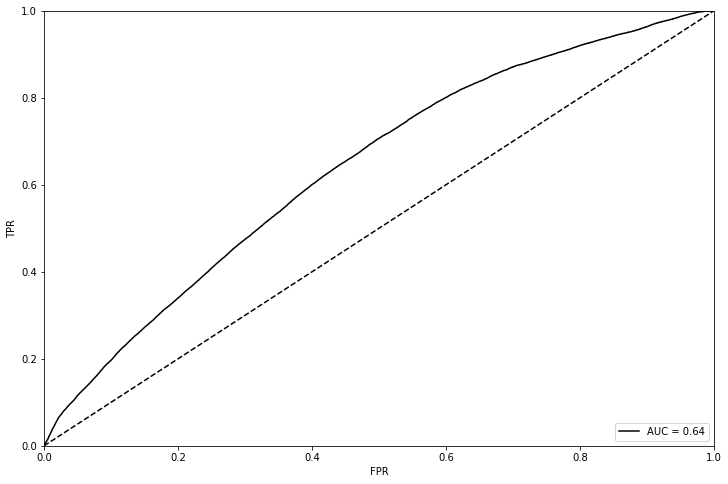

KstestResult(statistic=0.5165122962577374, pvalue=0.0)


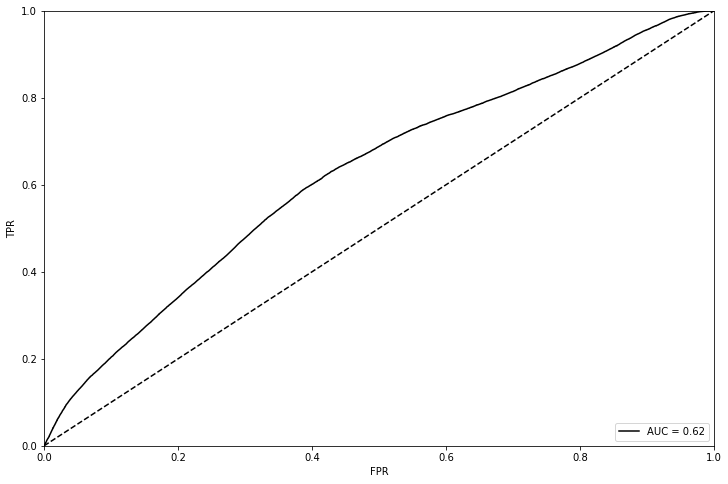

KstestResult(statistic=0.520708863270202, pvalue=0.0)


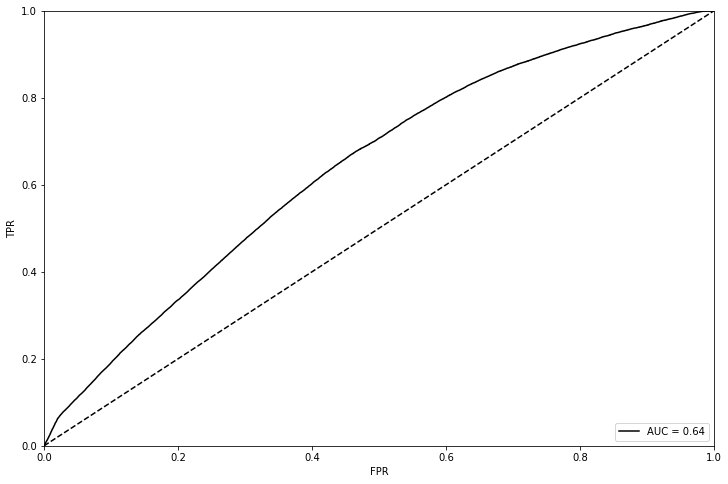

KstestResult(statistic=0.5171619267104897, pvalue=0.0)


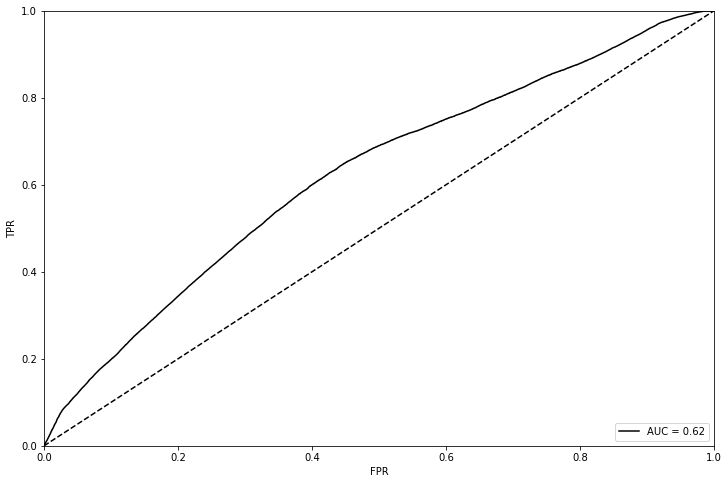

KstestResult(statistic=0.5164434959637757, pvalue=0.0)


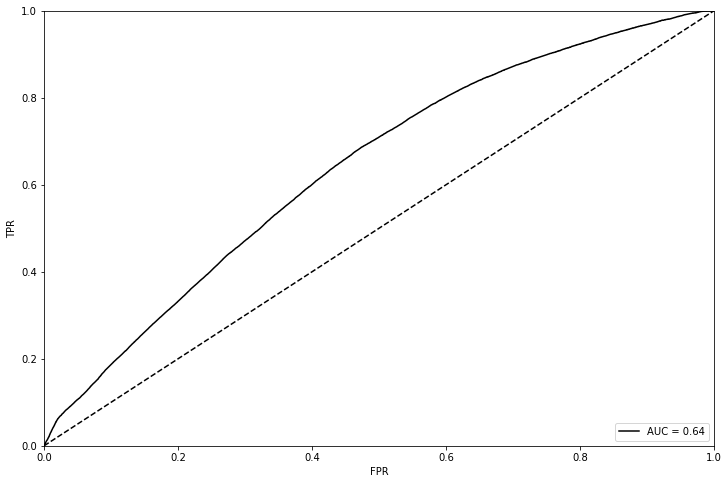

KstestResult(statistic=0.5215403366474108, pvalue=0.0)


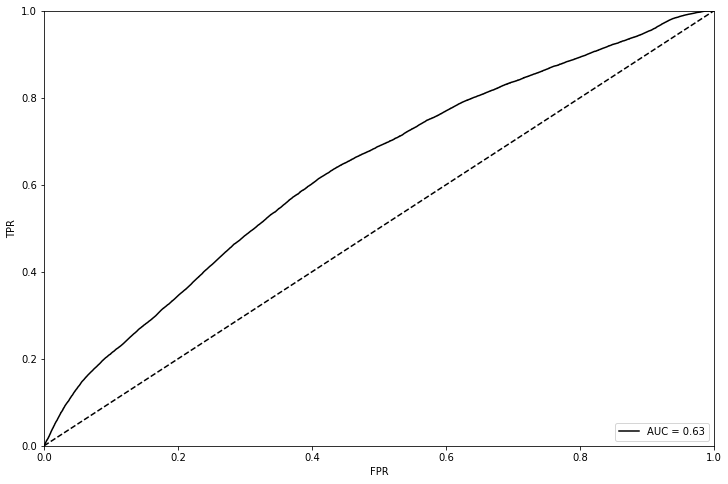

KstestResult(statistic=0.5168510330706134, pvalue=0.0)


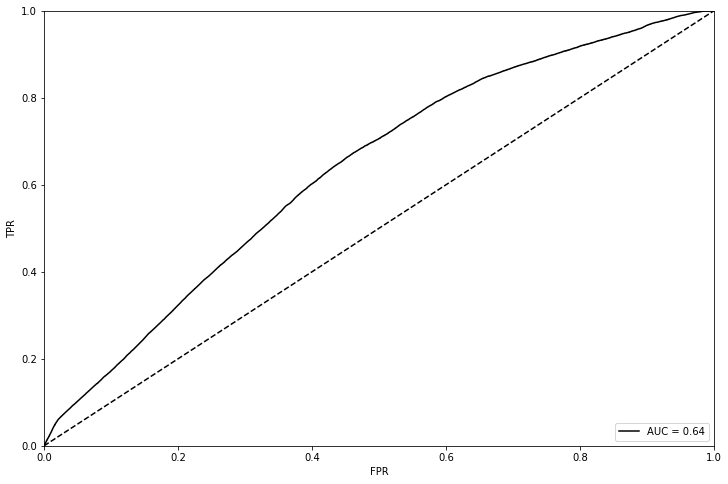

KstestResult(statistic=0.5107598232171907, pvalue=0.0)


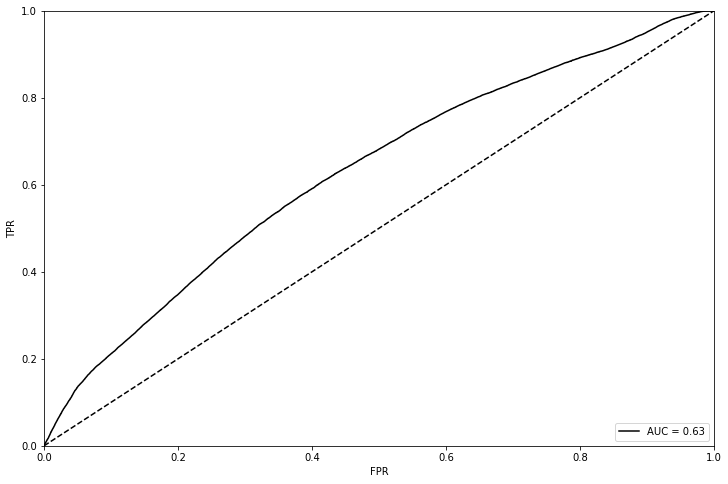

KstestResult(statistic=0.5221670502558265, pvalue=0.0)


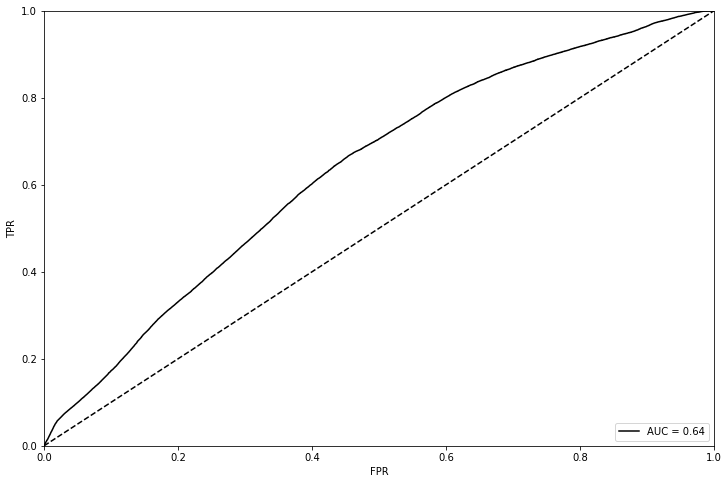

KstestResult(statistic=0.5114536435644076, pvalue=0.0)


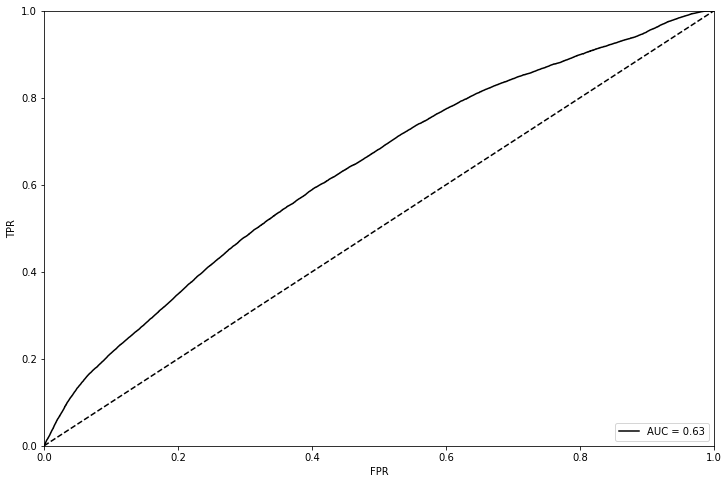

KstestResult(statistic=0.5284876651519809, pvalue=0.0)


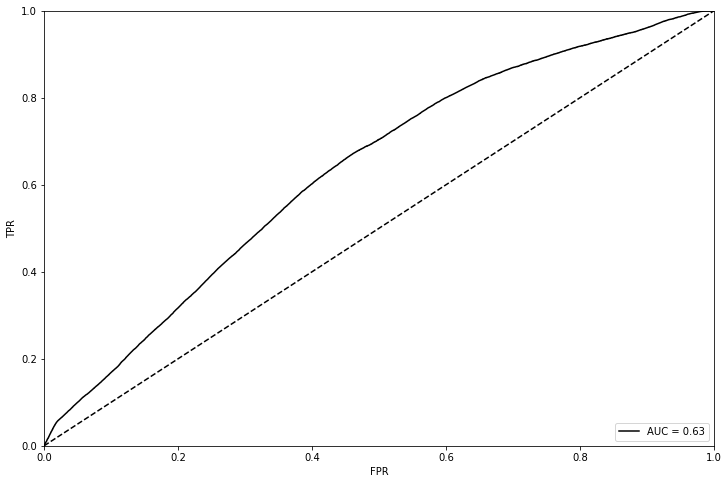

KstestResult(statistic=0.5217566717370182, pvalue=0.0)


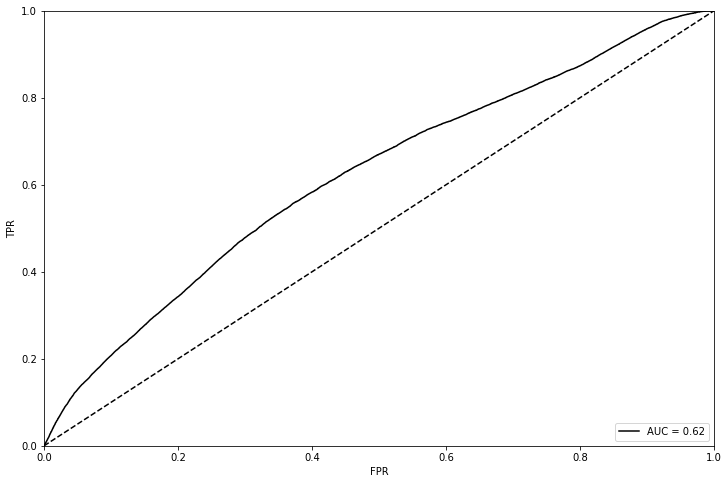

KstestResult(statistic=0.5130565656637005, pvalue=0.0)


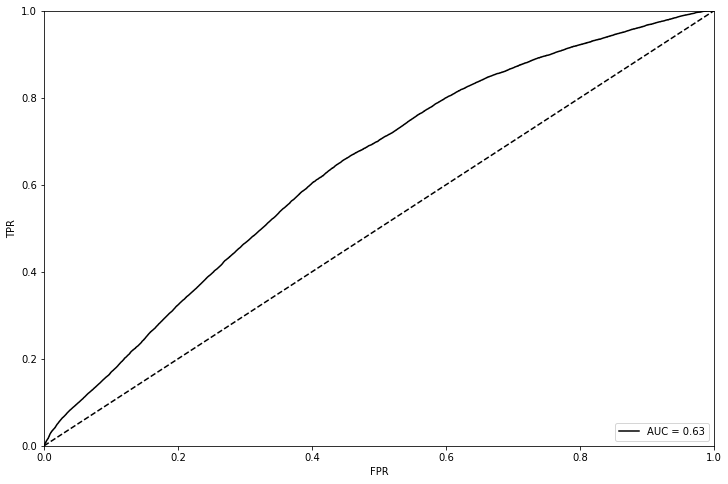

KstestResult(statistic=0.5073637242758298, pvalue=0.0)


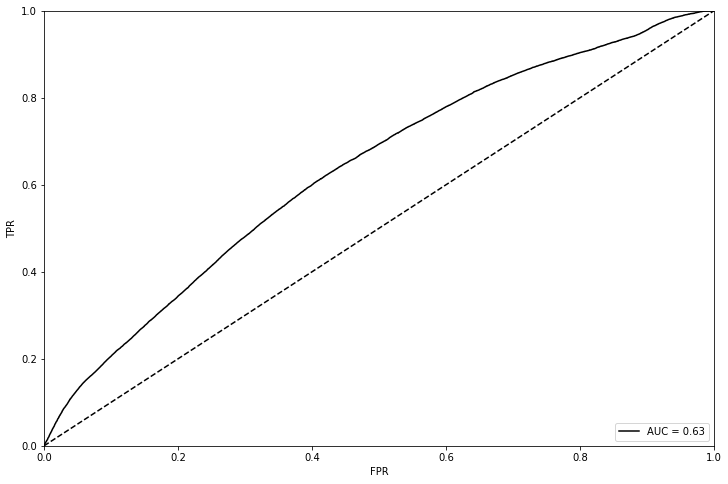

KstestResult(statistic=0.5226385413905932, pvalue=0.0)


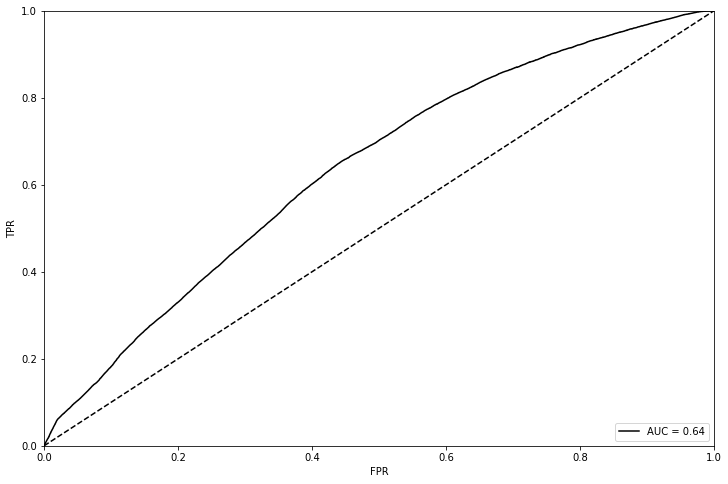

KstestResult(statistic=0.5120013302409837, pvalue=0.0)


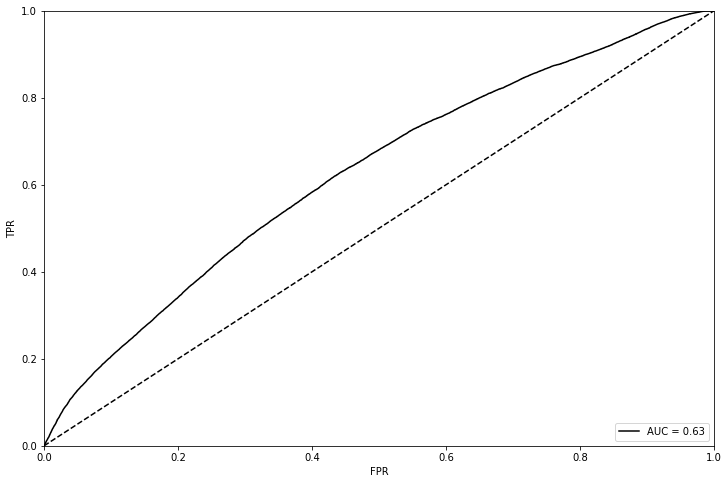

KstestResult(statistic=0.5202854319203525, pvalue=0.0)


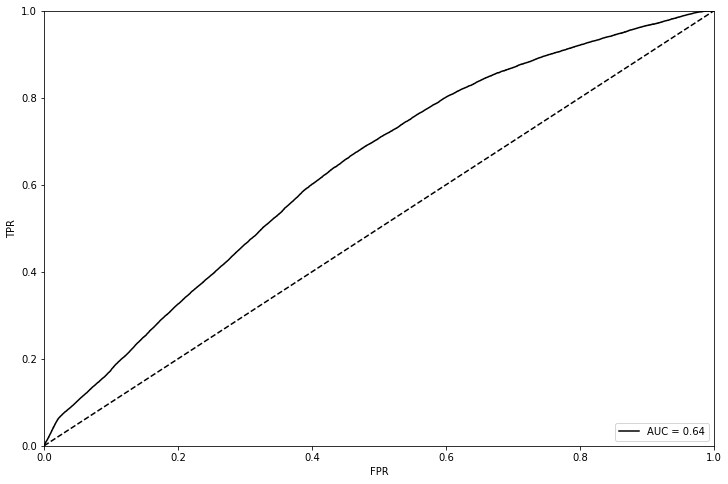

KstestResult(statistic=0.5131999352205031, pvalue=0.0)


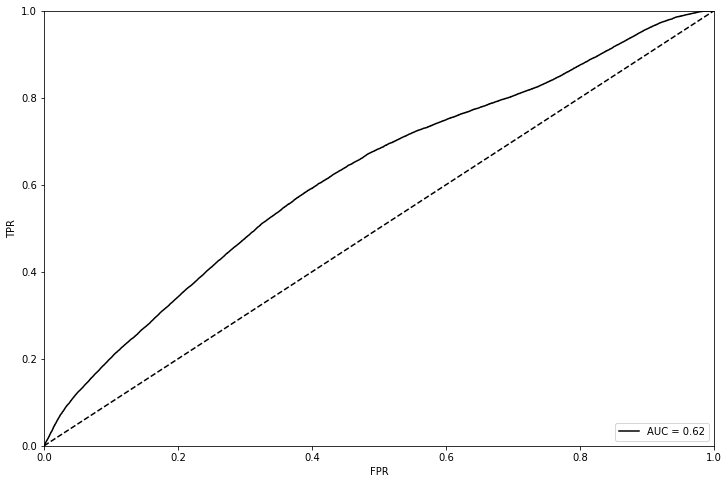

KstestResult(statistic=0.5135008100076335, pvalue=0.0)


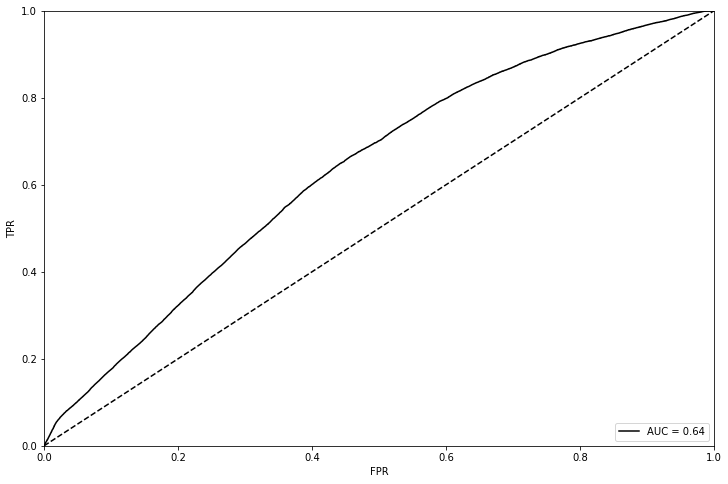

KstestResult(statistic=0.5113909189352548, pvalue=0.0)


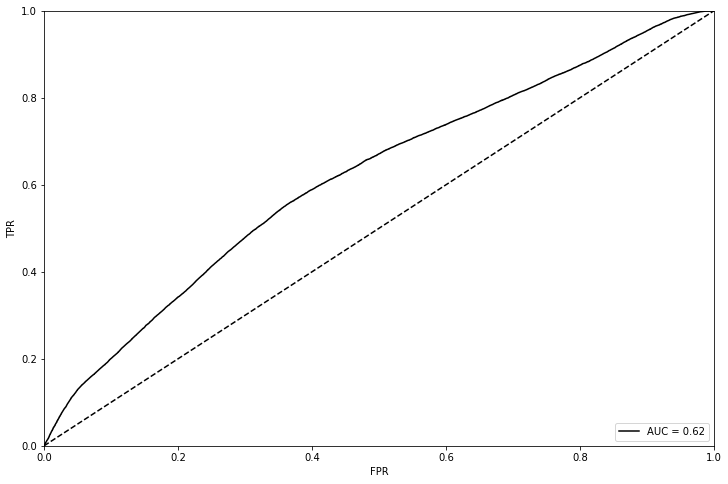

KstestResult(statistic=0.5260193544414441, pvalue=0.0)


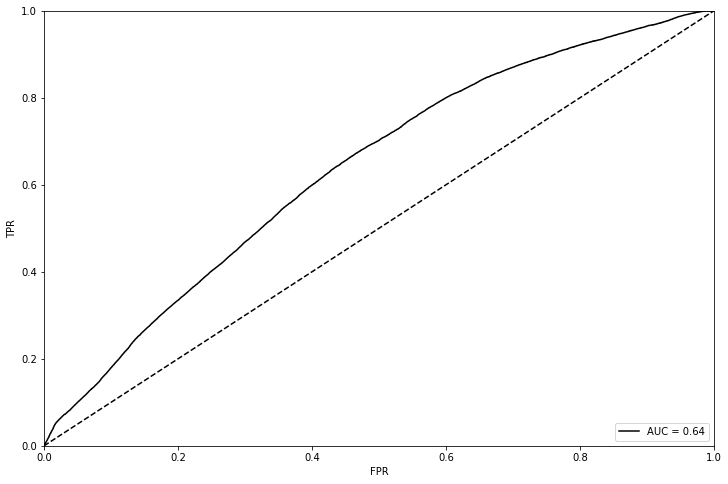

KstestResult(statistic=0.5196717674978308, pvalue=0.0)


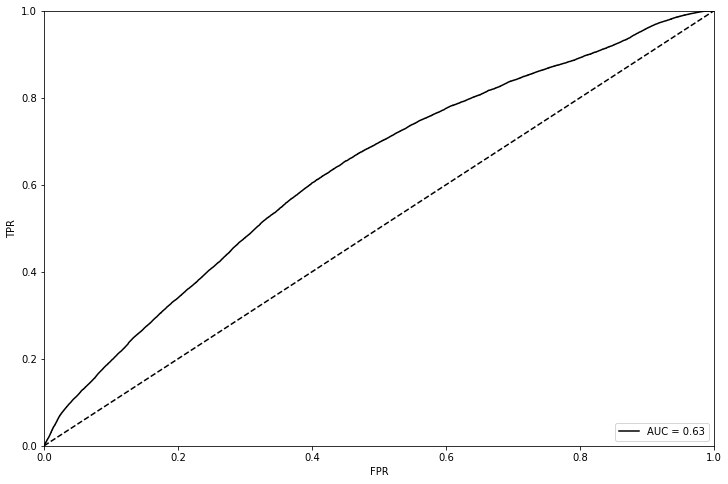

KstestResult(statistic=0.5168308888474199, pvalue=0.0)


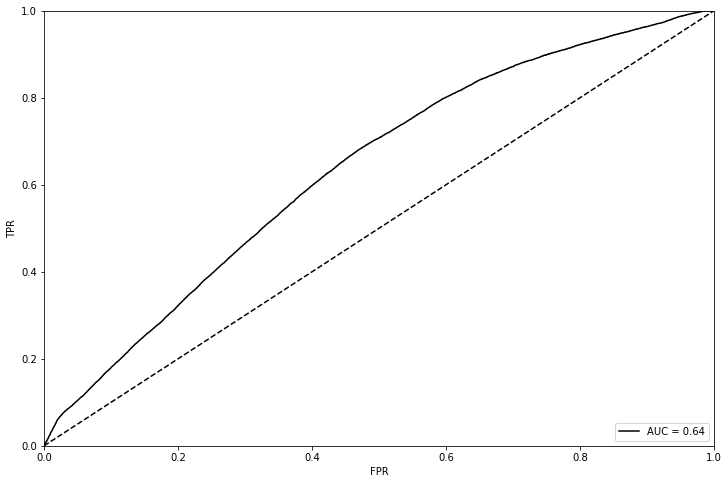

KstestResult(statistic=0.5152446057517298, pvalue=0.0)


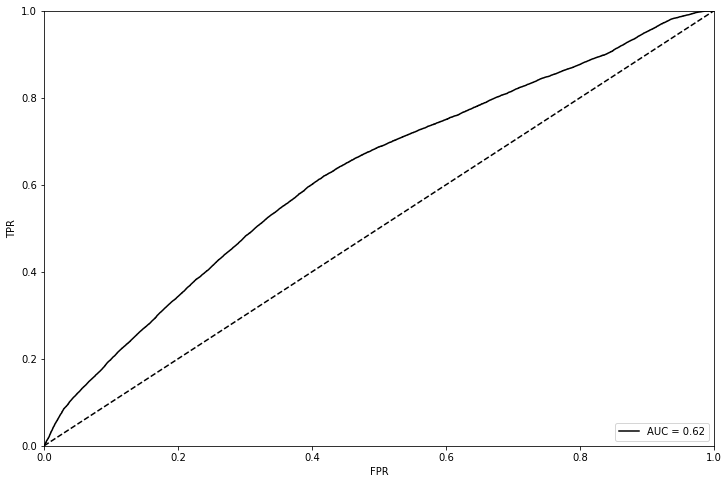

KstestResult(statistic=0.5183689770812778, pvalue=0.0)


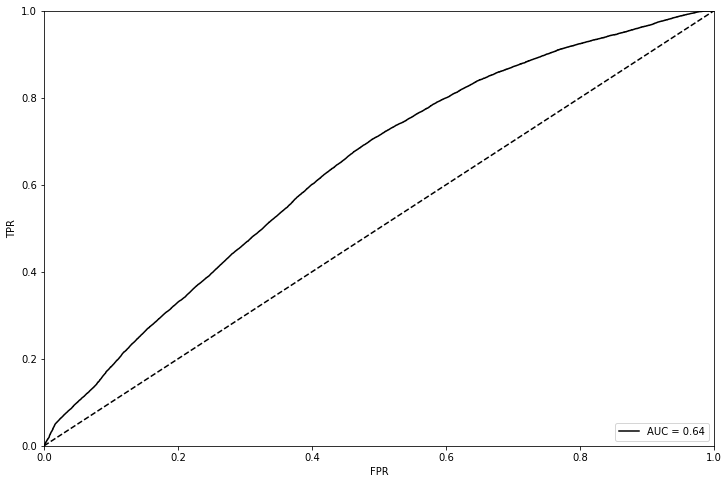

KstestResult(statistic=0.5251252058676392, pvalue=0.0)


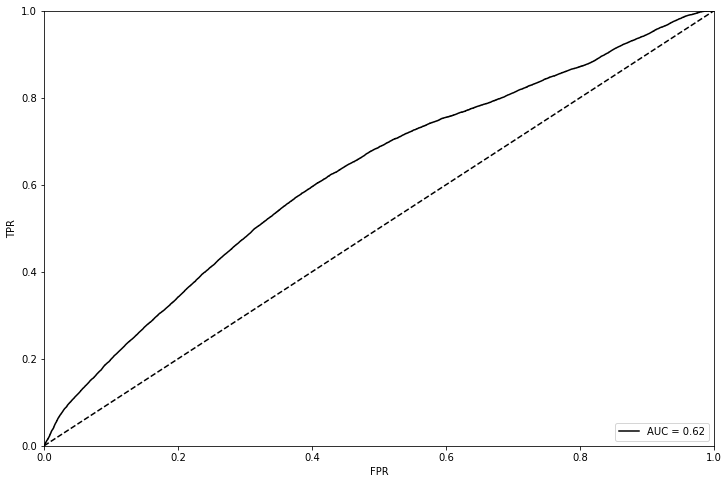

KstestResult(statistic=0.5248606213451894, pvalue=0.0)


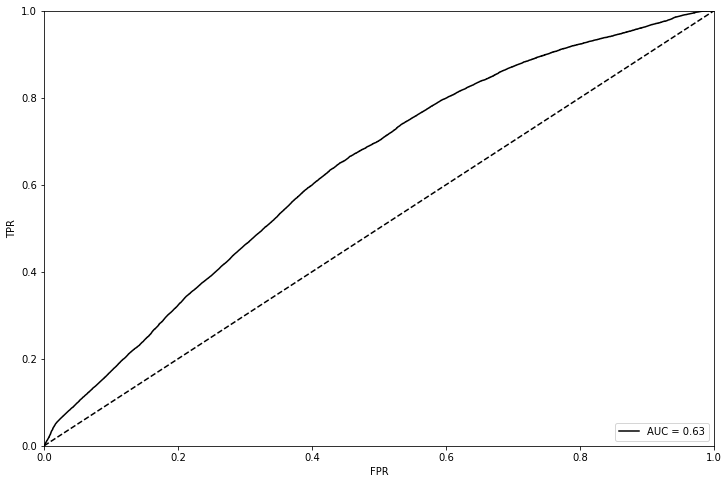

KstestResult(statistic=0.5139164588584308, pvalue=0.0)


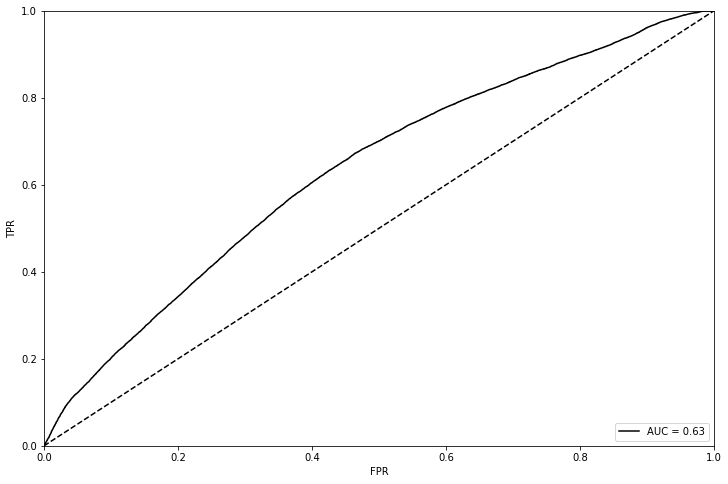

KstestResult(statistic=0.5182873678912571, pvalue=0.0)


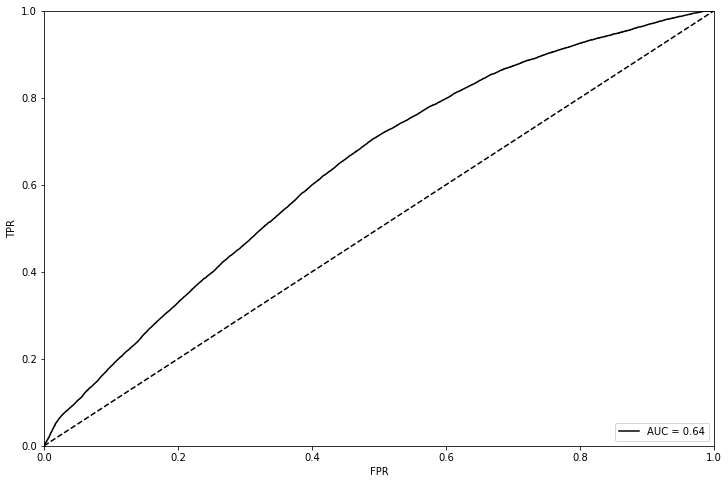

KstestResult(statistic=0.5256536890564, pvalue=0.0)


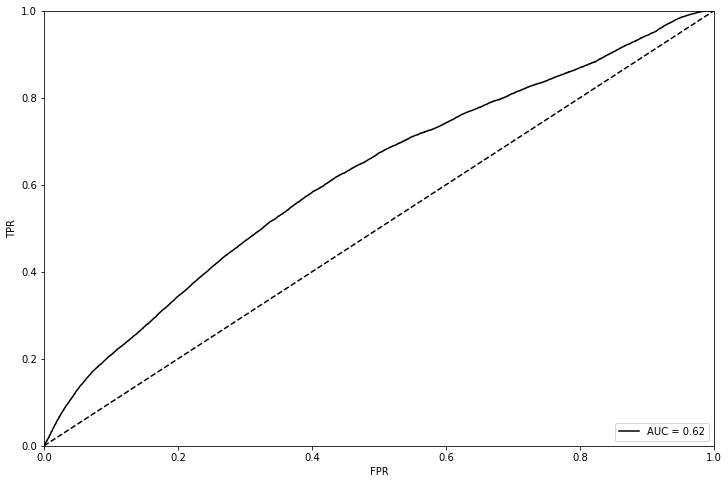

KstestResult(statistic=0.523662475970252, pvalue=0.0)


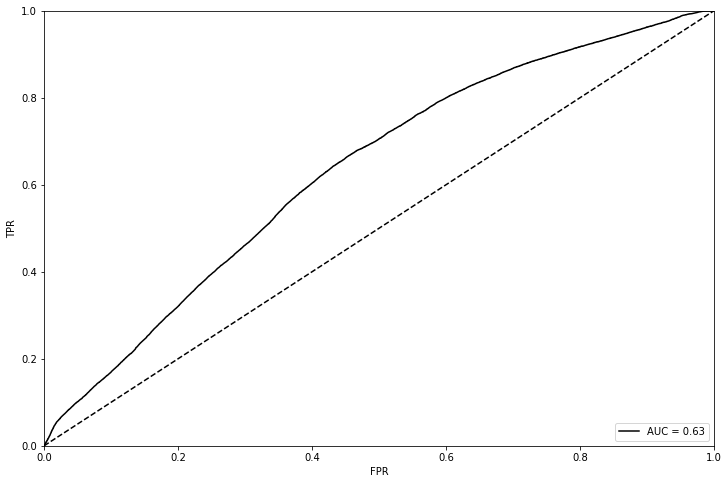

KstestResult(statistic=0.5113220284190511, pvalue=0.0)


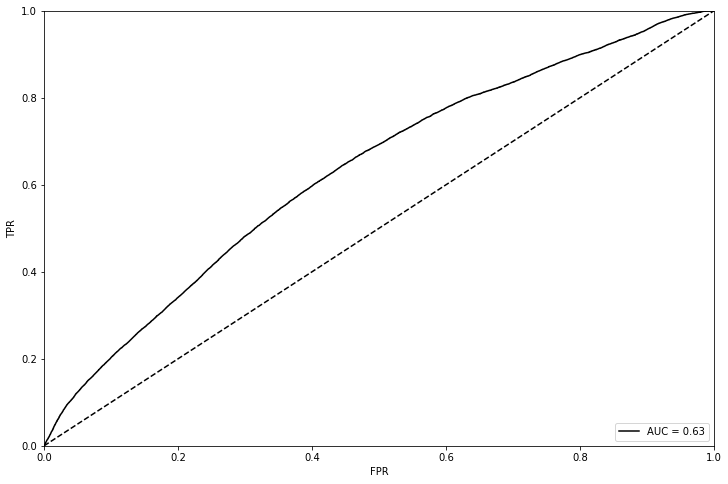

KstestResult(statistic=0.5164975065876561, pvalue=0.0)


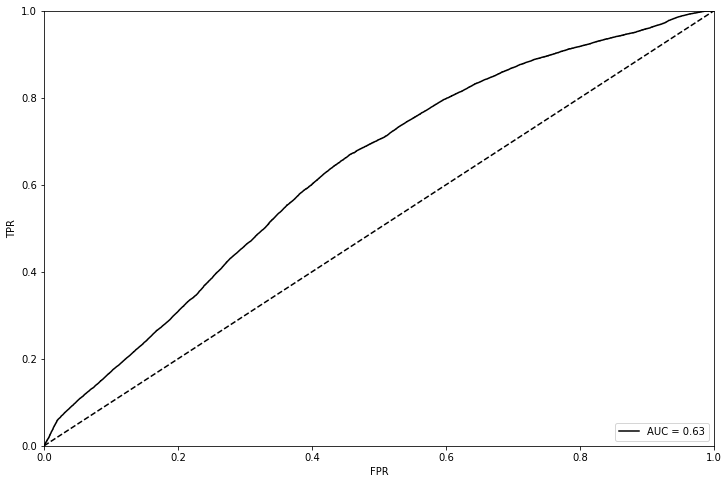

KstestResult(statistic=0.5131694253204001, pvalue=0.0)


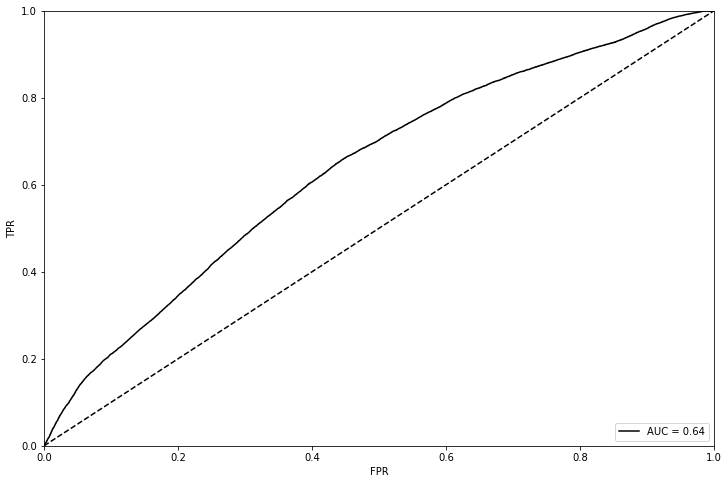

KstestResult(statistic=0.5184009767769806, pvalue=0.0)


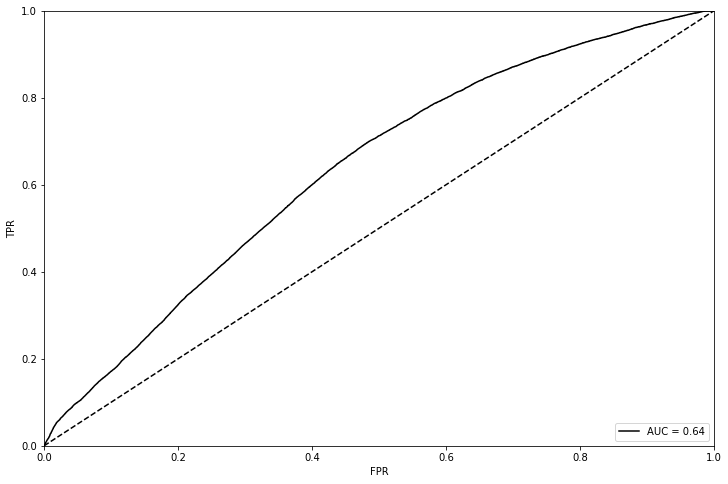

KstestResult(statistic=0.527772128321455, pvalue=0.0)


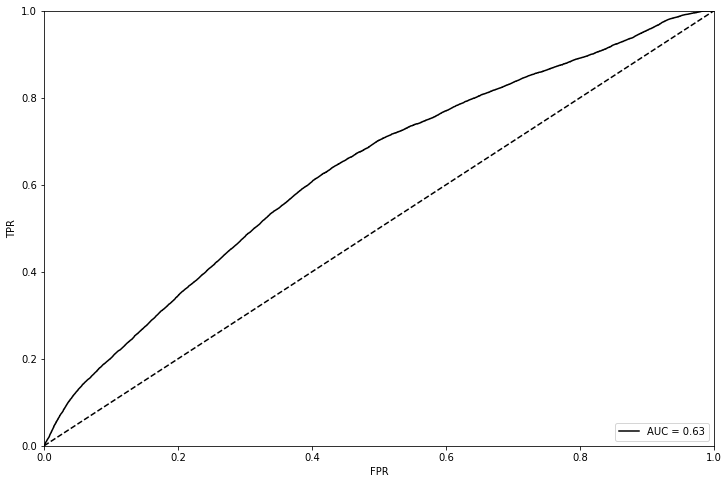

KstestResult(statistic=0.516682467370601, pvalue=0.0)


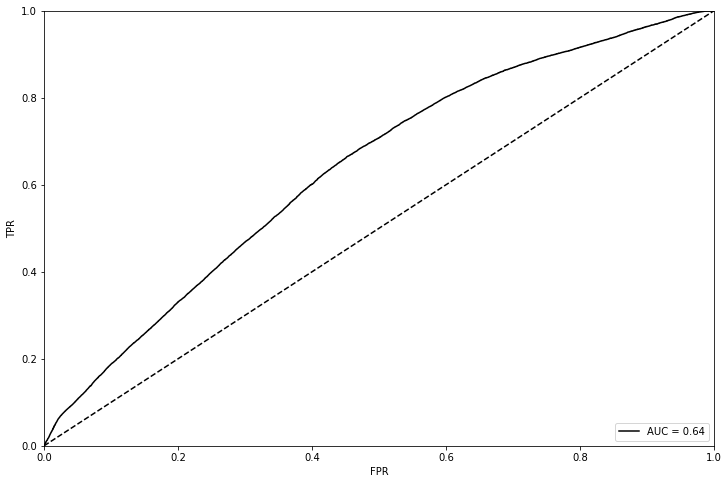

KstestResult(statistic=0.5114932656179622, pvalue=0.0)


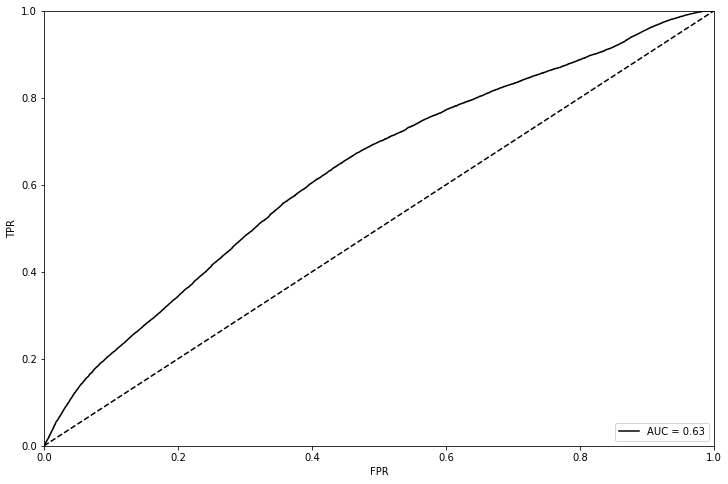

KstestResult(statistic=0.5177431100159939, pvalue=0.0)


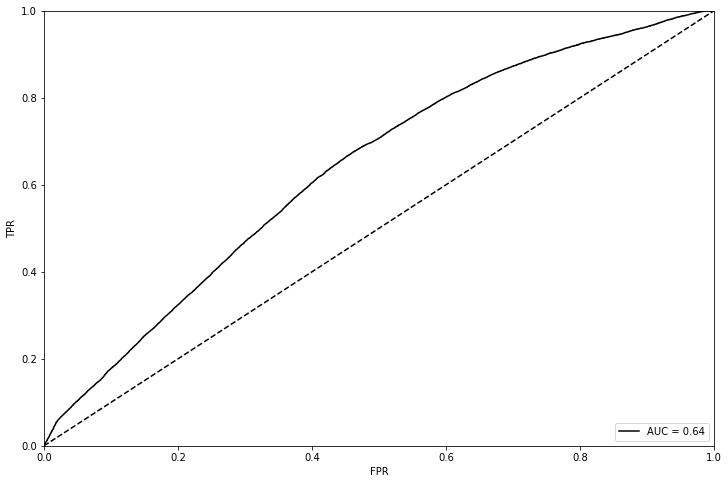

KstestResult(statistic=0.5123599123066784, pvalue=0.0)


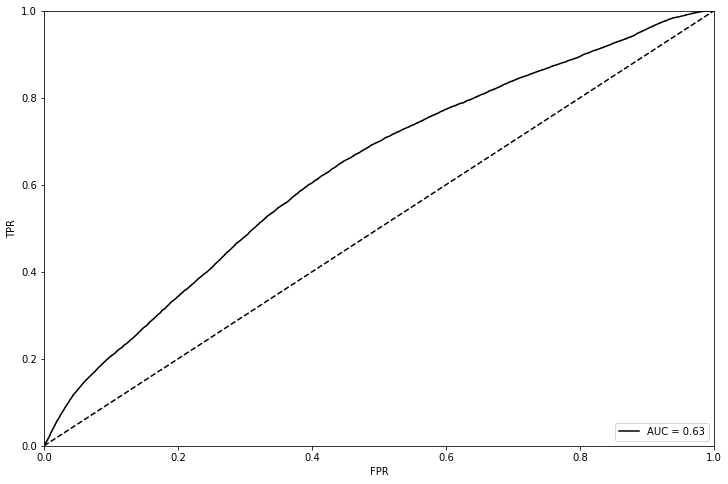

KstestResult(statistic=0.5107654120319602, pvalue=0.0)


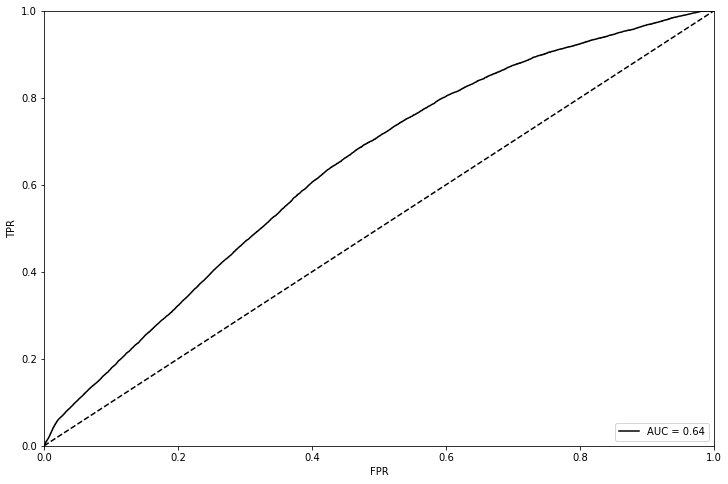

KstestResult(statistic=0.5118801800845524, pvalue=0.0)


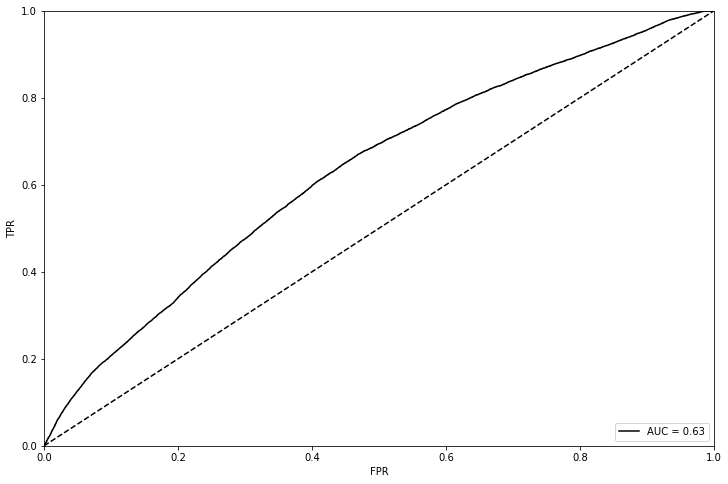

KstestResult(statistic=0.5272170149577319, pvalue=0.0)


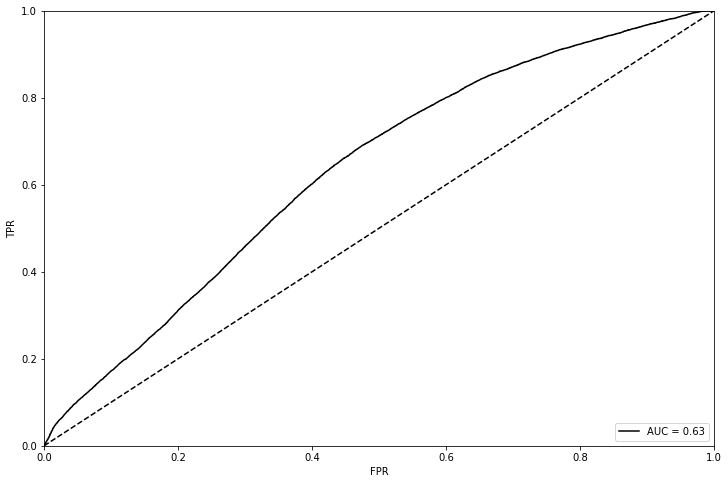

KstestResult(statistic=0.5269751577426667, pvalue=0.0)


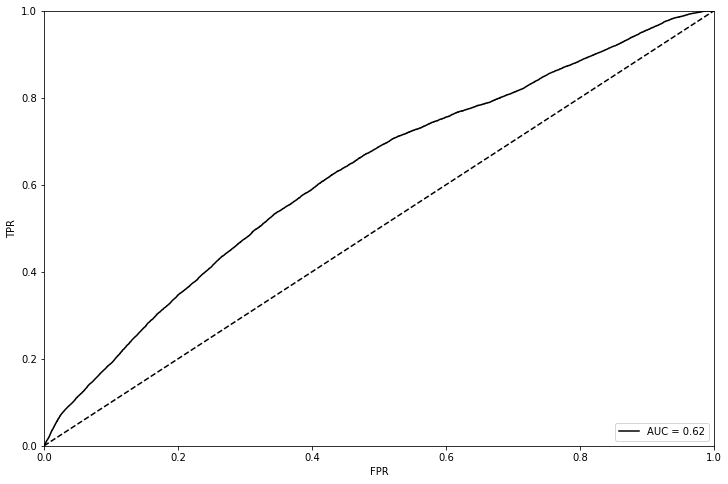

KstestResult(statistic=0.5111606024616555, pvalue=0.0)


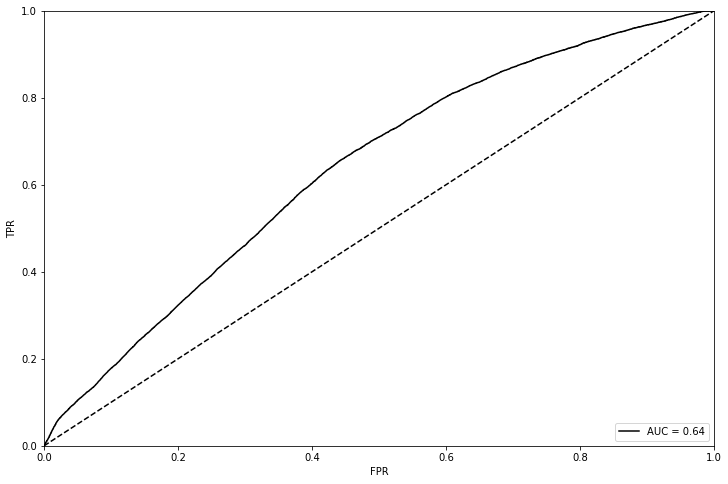

KstestResult(statistic=0.5102482696463955, pvalue=0.0)


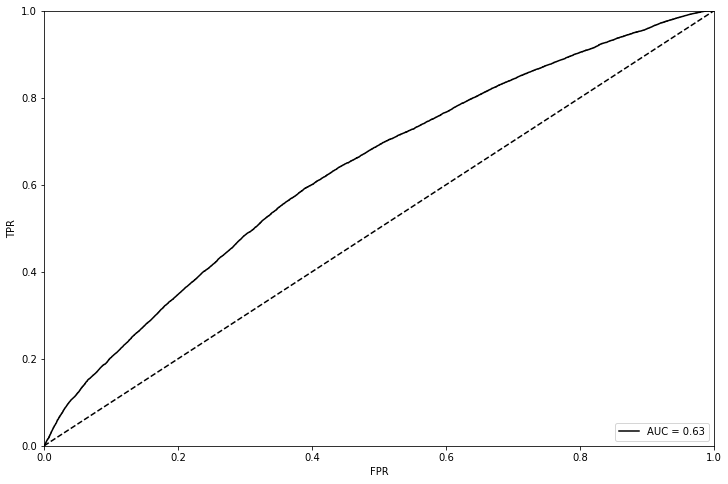

KstestResult(statistic=0.5220283174718886, pvalue=0.0)


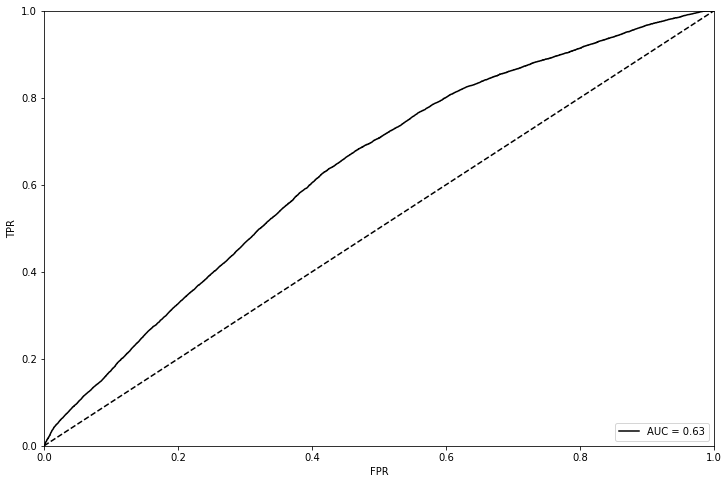

KstestResult(statistic=0.519927600544969, pvalue=0.0)


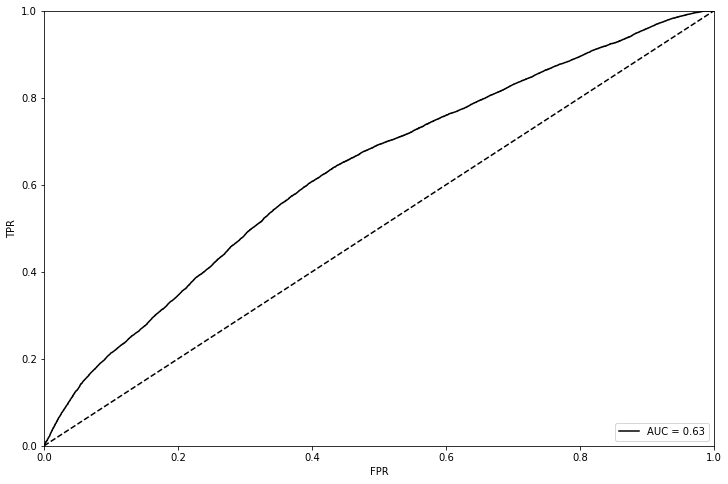

KstestResult(statistic=0.5118925949015732, pvalue=0.0)


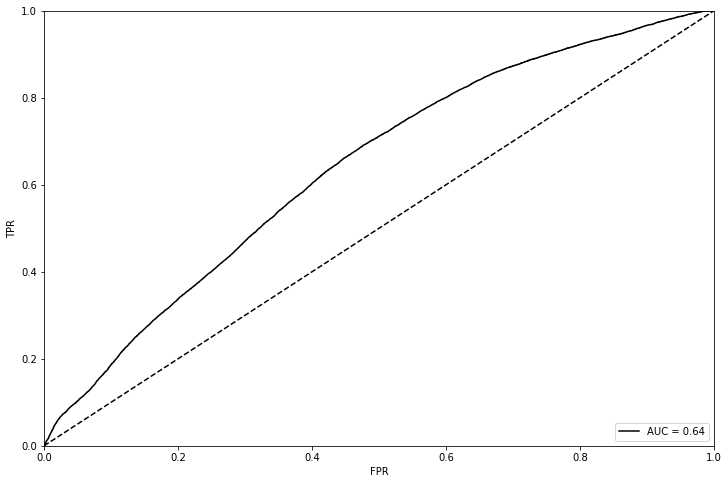

KstestResult(statistic=0.5216590265550151, pvalue=0.0)


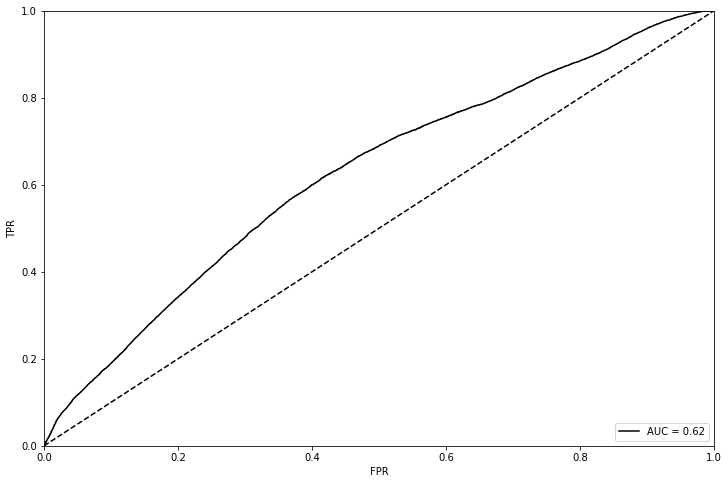

KstestResult(statistic=0.5097338479243616, pvalue=0.0)


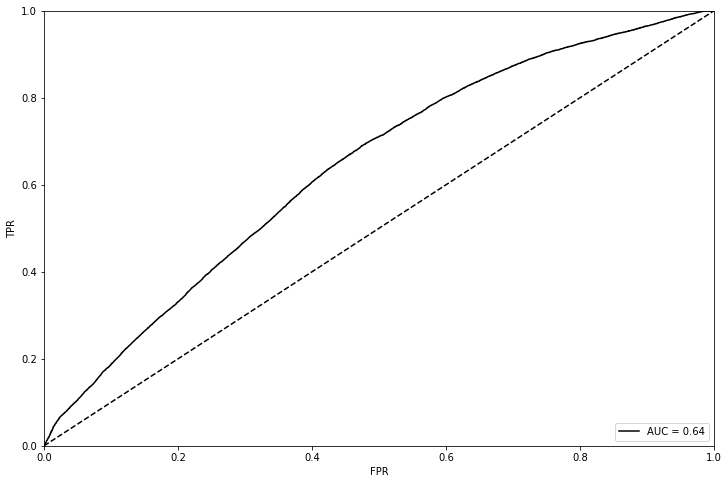

KstestResult(statistic=0.512394416969087, pvalue=0.0)


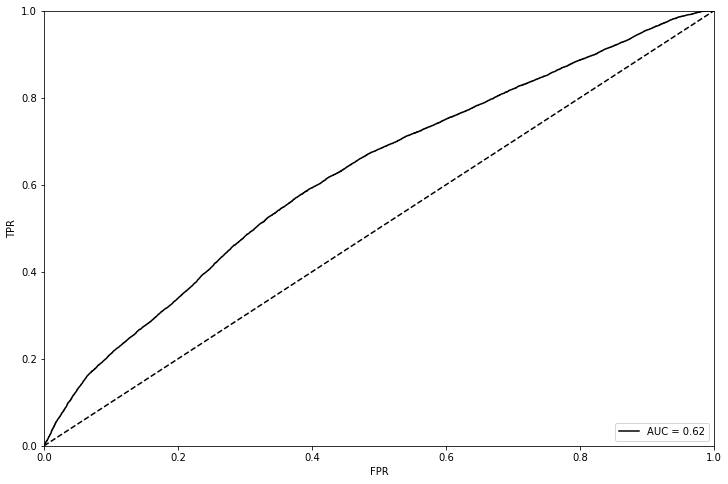

KstestResult(statistic=0.519022065983679, pvalue=0.0)


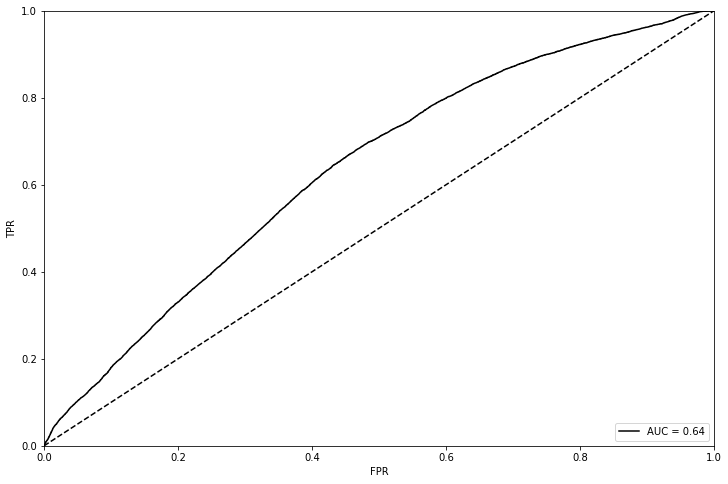

KstestResult(statistic=0.5119646862028323, pvalue=0.0)


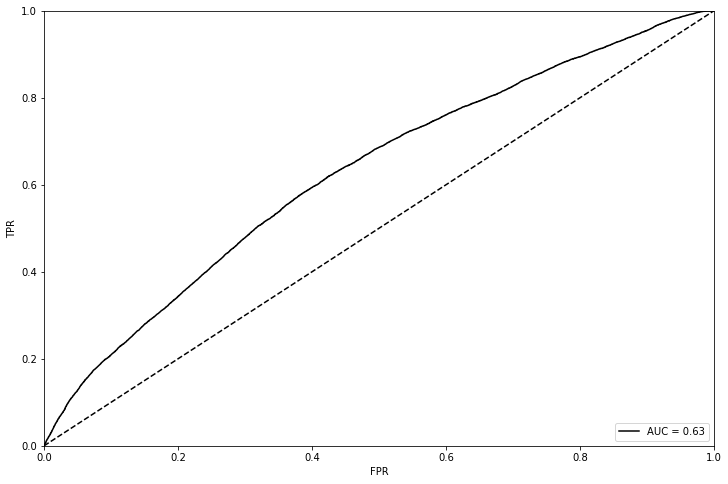

KstestResult(statistic=0.5189026221655827, pvalue=0.0)


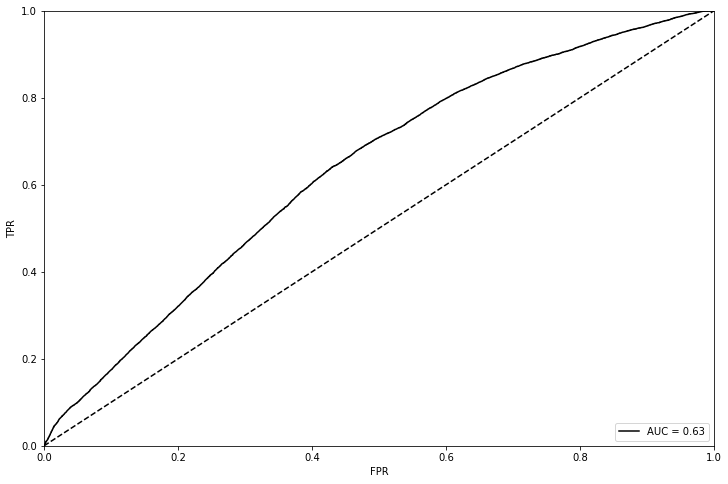

KstestResult(statistic=0.5122043683807161, pvalue=0.0)


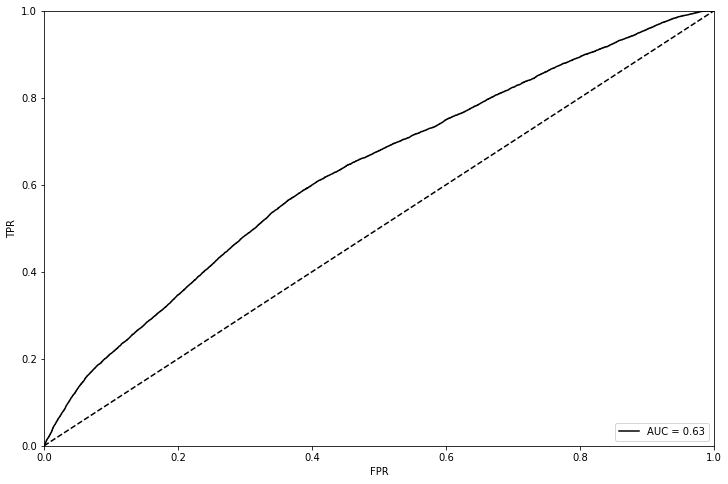

KstestResult(statistic=0.5232228195007279, pvalue=0.0)


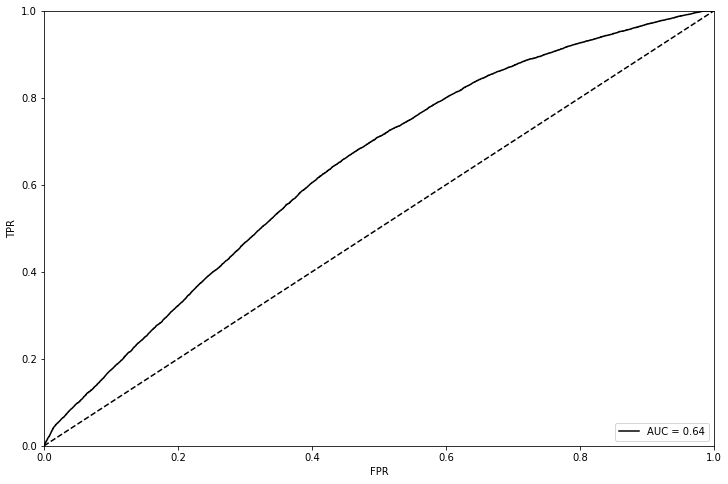

KstestResult(statistic=0.515940042743565, pvalue=0.0)


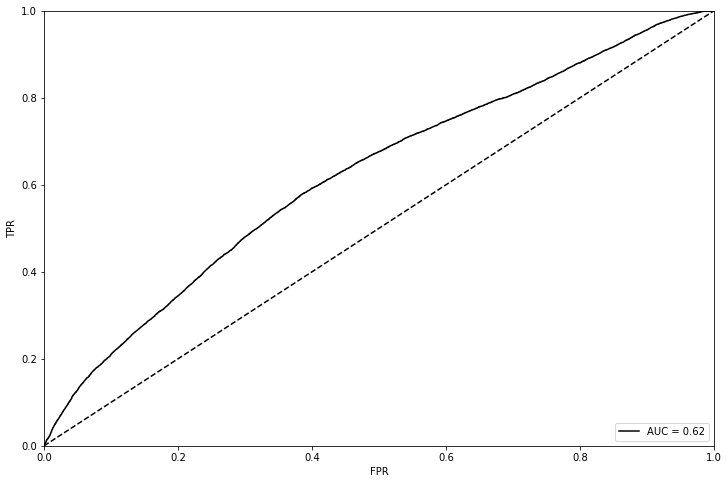

KstestResult(statistic=0.519632768925731, pvalue=0.0)


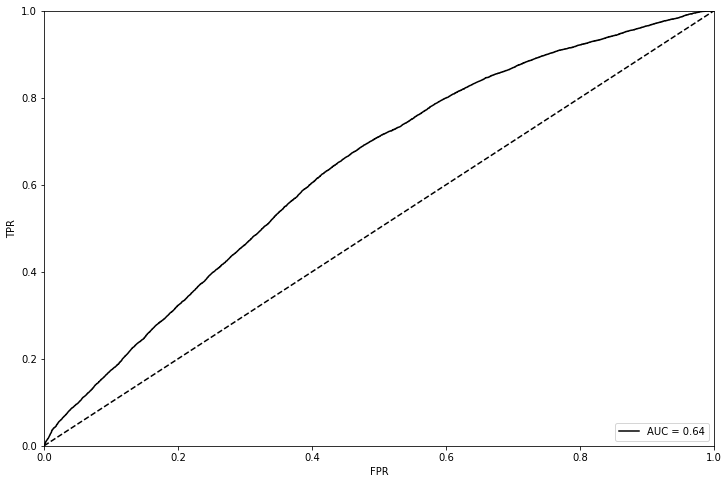

KstestResult(statistic=0.5159934865333563, pvalue=0.0)


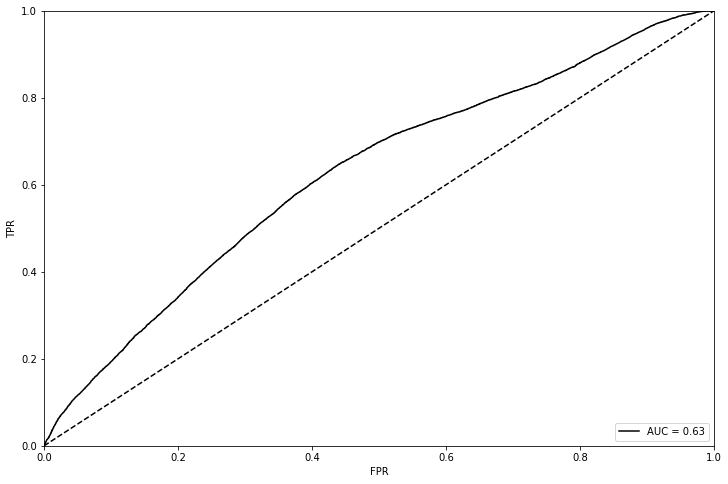

KstestResult(statistic=0.520059072530906, pvalue=0.0)


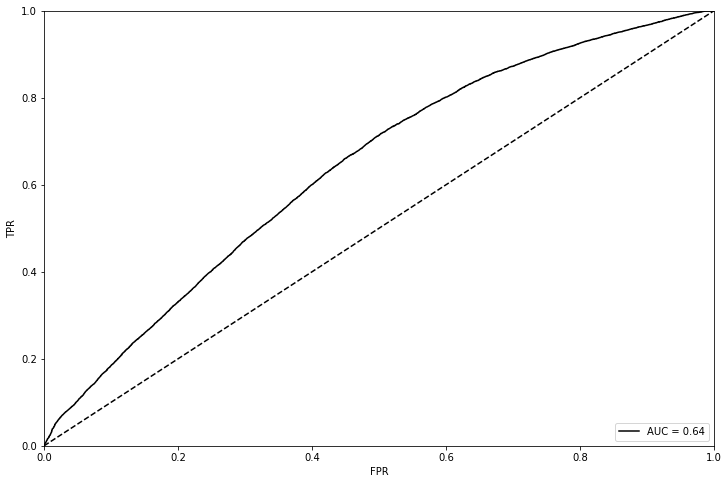

KstestResult(statistic=0.5215840849220564, pvalue=0.0)


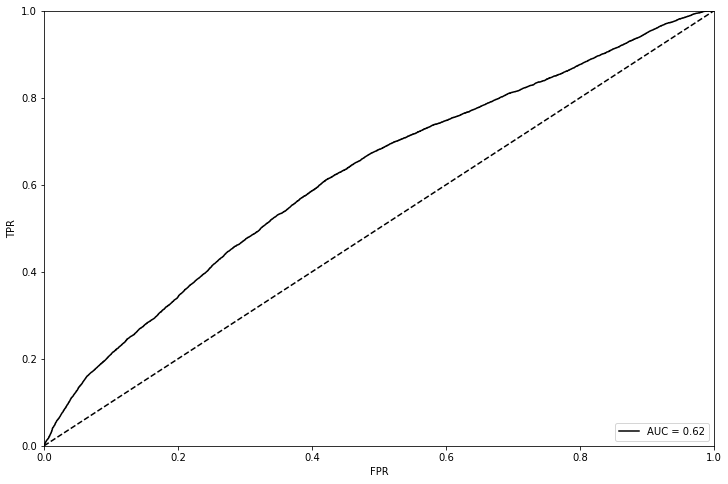

KstestResult(statistic=0.5250376313978677, pvalue=0.0)


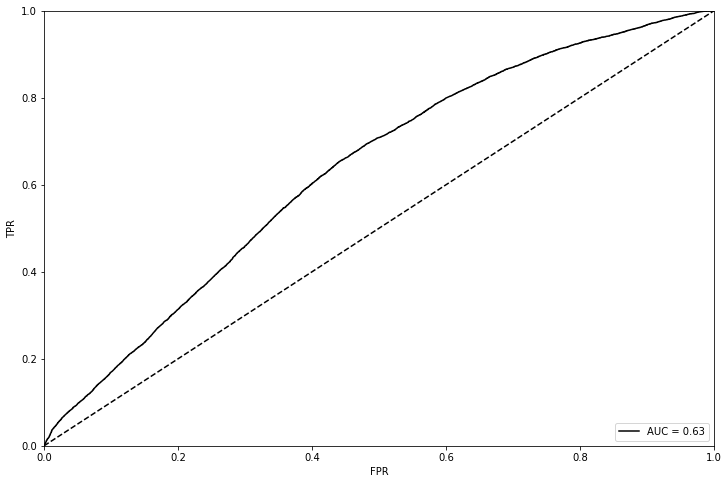

KstestResult(statistic=0.504245265863697, pvalue=0.0)


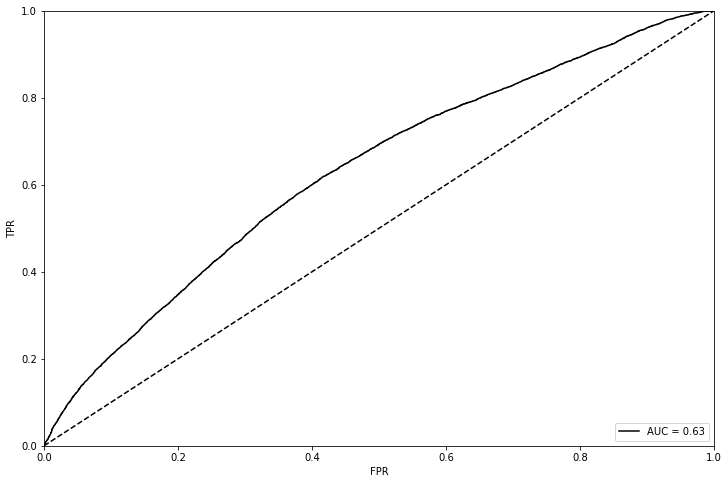

KstestResult(statistic=0.5159800061659033, pvalue=0.0)


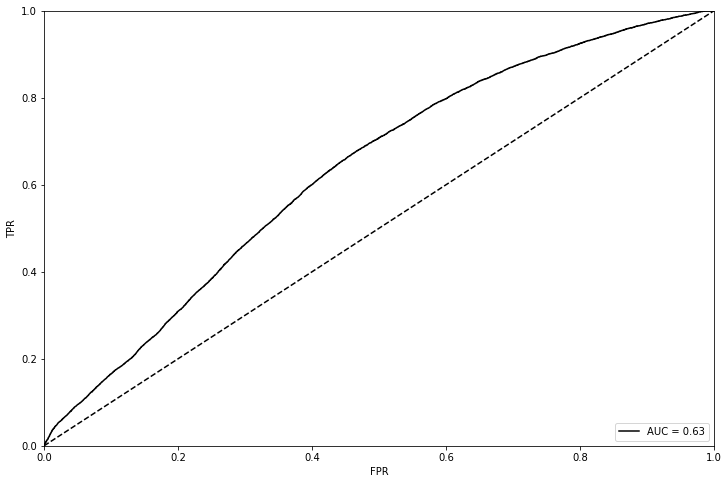

KstestResult(statistic=0.5179439428252978, pvalue=0.0)


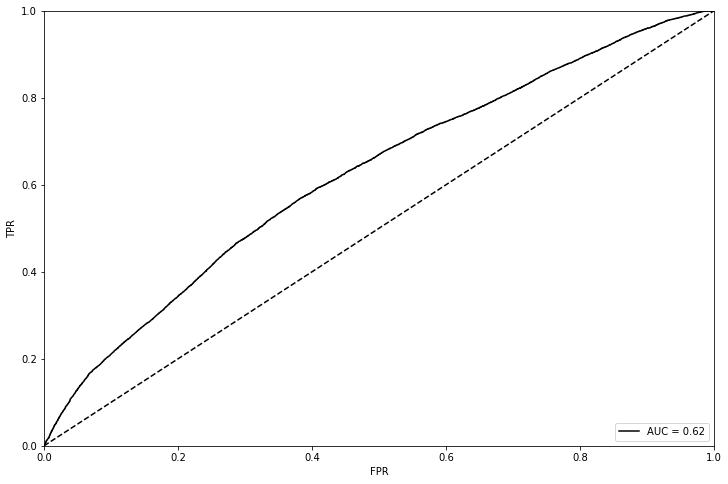

KstestResult(statistic=0.5246576523887208, pvalue=0.0)


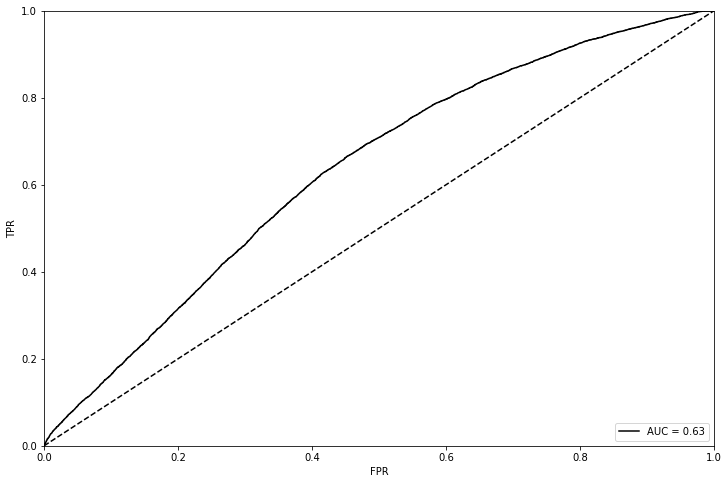

KstestResult(statistic=0.5074830193591654, pvalue=0.0)


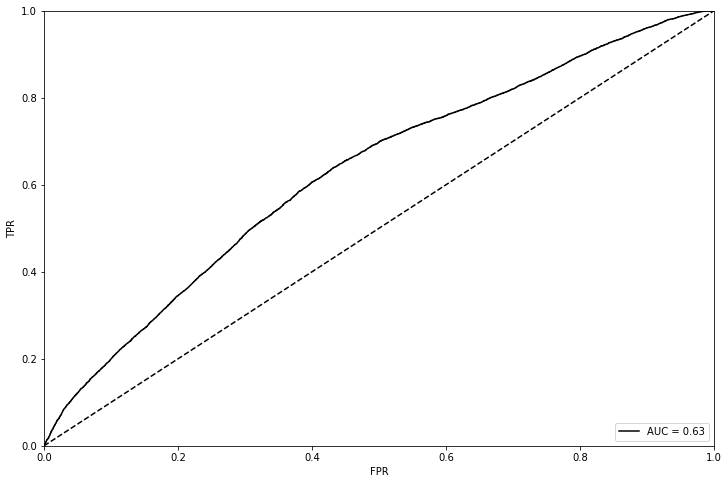

KstestResult(statistic=0.5207370899109565, pvalue=0.0)


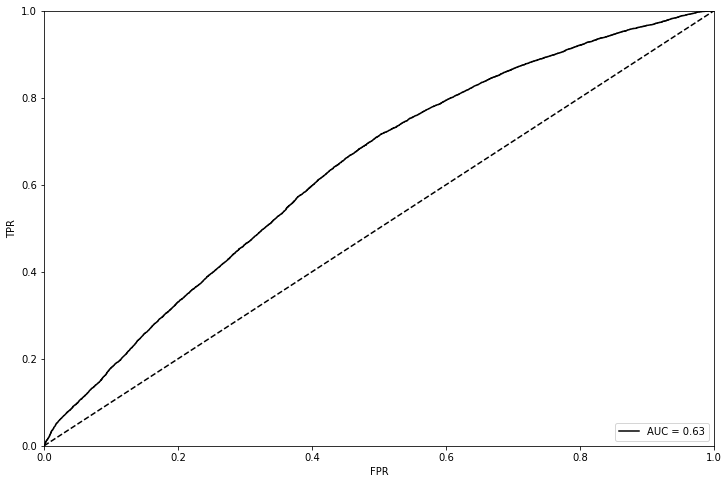

KstestResult(statistic=0.5216960331448005, pvalue=0.0)


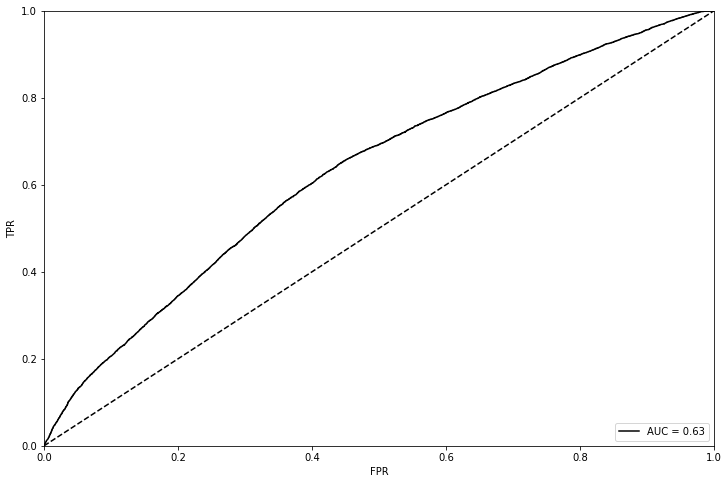

KstestResult(statistic=0.518098324206155, pvalue=0.0)


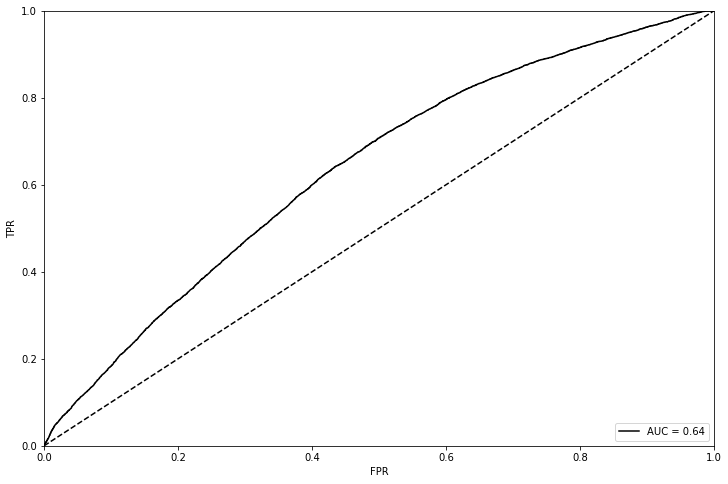

KstestResult(statistic=0.5115193707815161, pvalue=0.0)


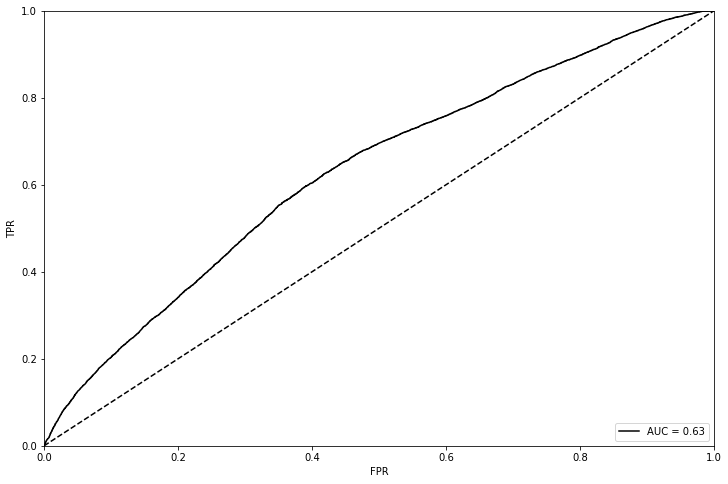

KstestResult(statistic=0.5157176276855618, pvalue=0.0)


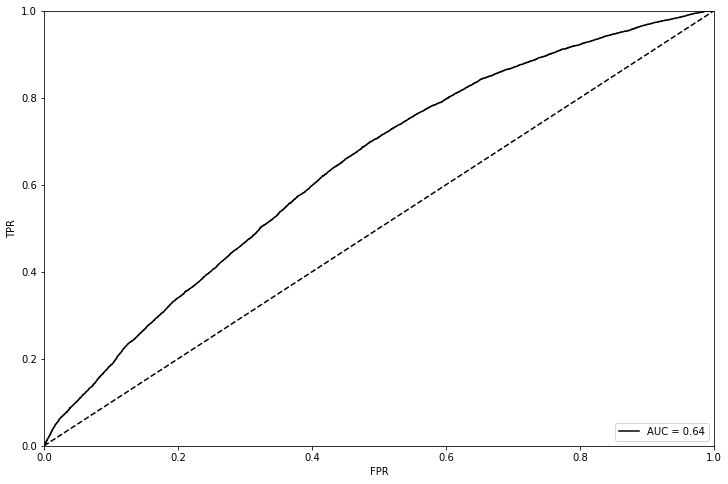

KstestResult(statistic=0.5219875355788632, pvalue=0.0)


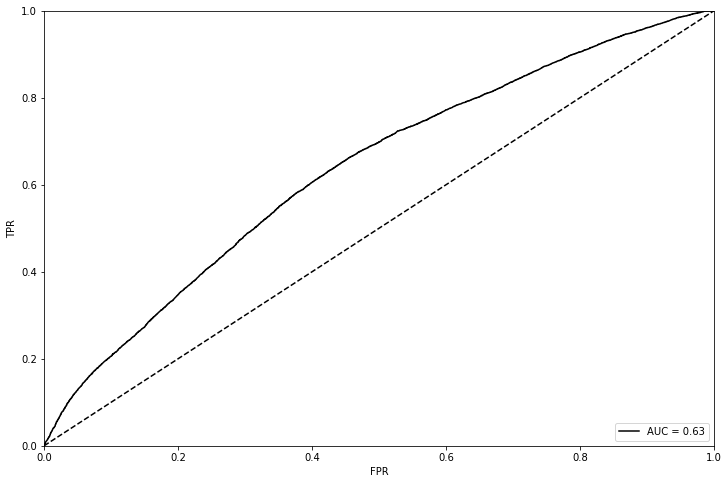

KstestResult(statistic=0.5163234281487904, pvalue=0.0)


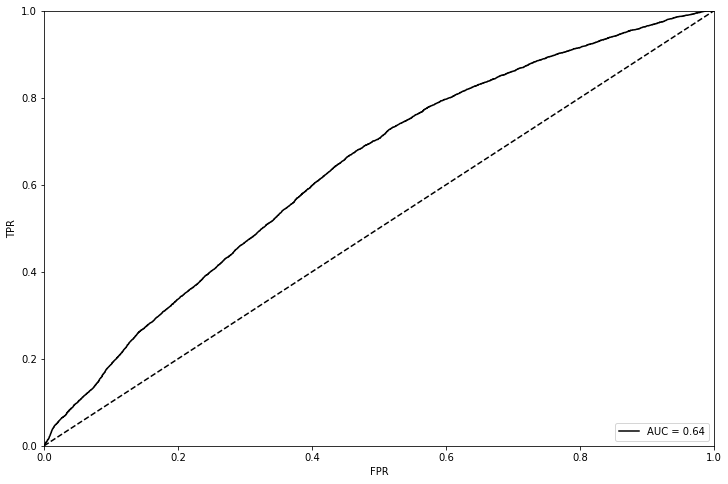

KstestResult(statistic=0.5177990499855107, pvalue=0.0)


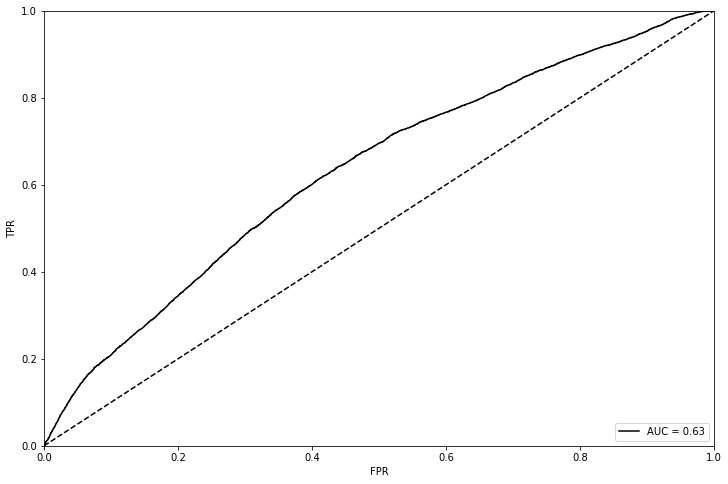

KstestResult(statistic=0.5095501437682238, pvalue=0.0)


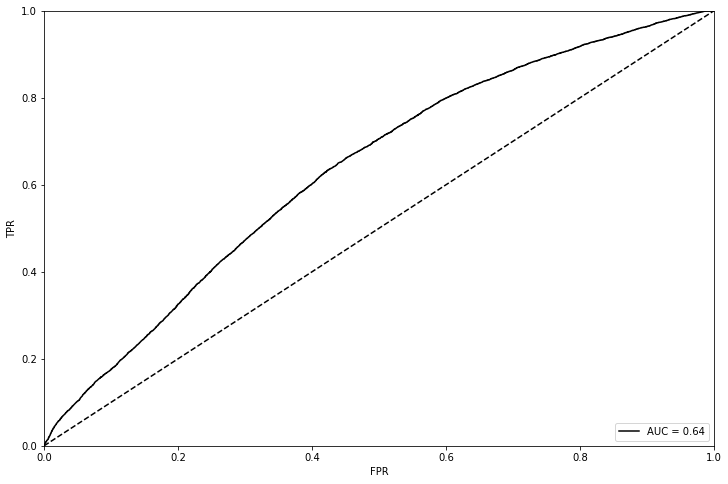

KstestResult(statistic=0.5189109053304896, pvalue=0.0)


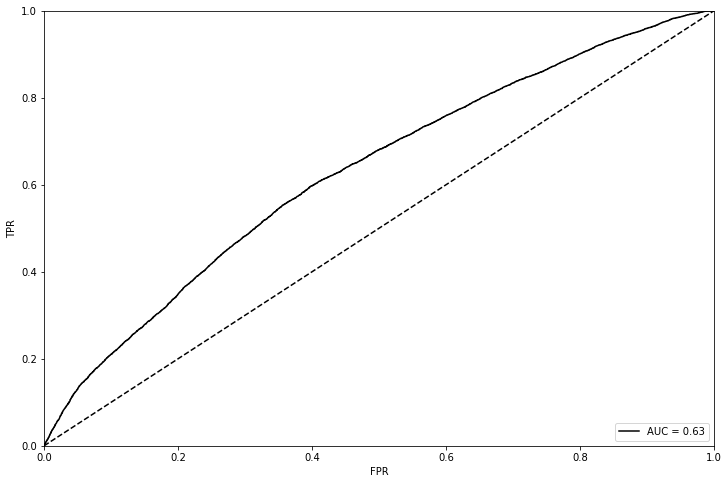

KstestResult(statistic=0.5139957153867976, pvalue=0.0)


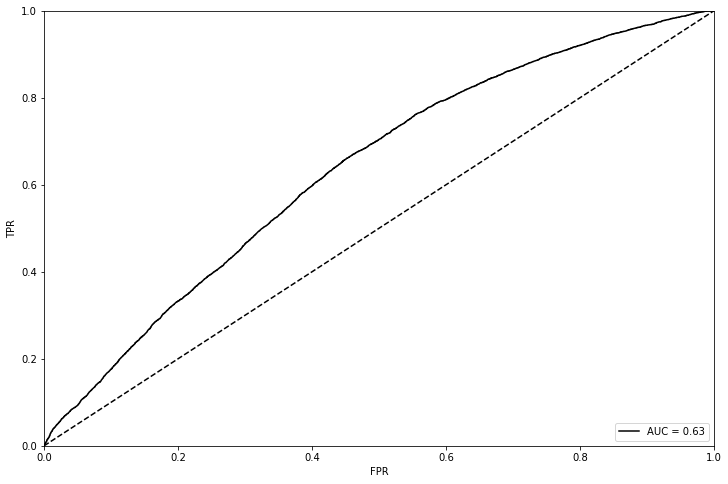

KstestResult(statistic=0.5116550058796105, pvalue=0.0)


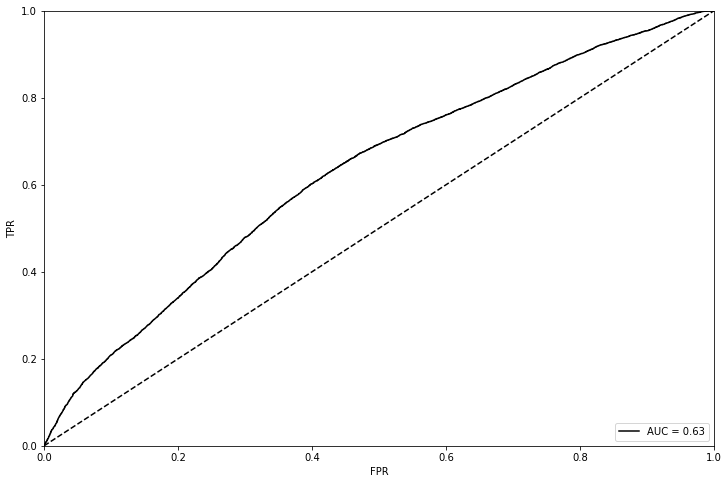

KstestResult(statistic=0.5077700834655895, pvalue=0.0)


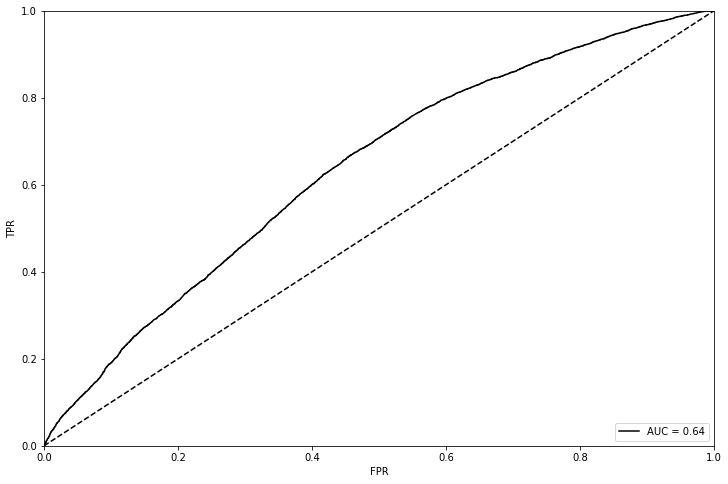

KstestResult(statistic=0.5200808684830593, pvalue=0.0)


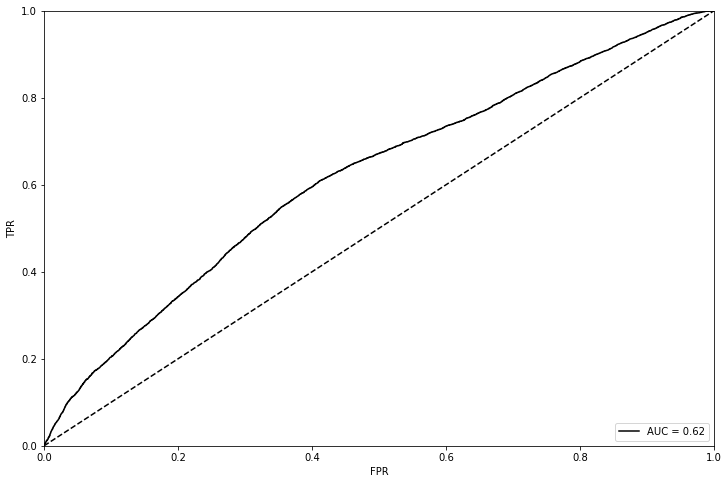

KstestResult(statistic=0.5136506739545524, pvalue=0.0)


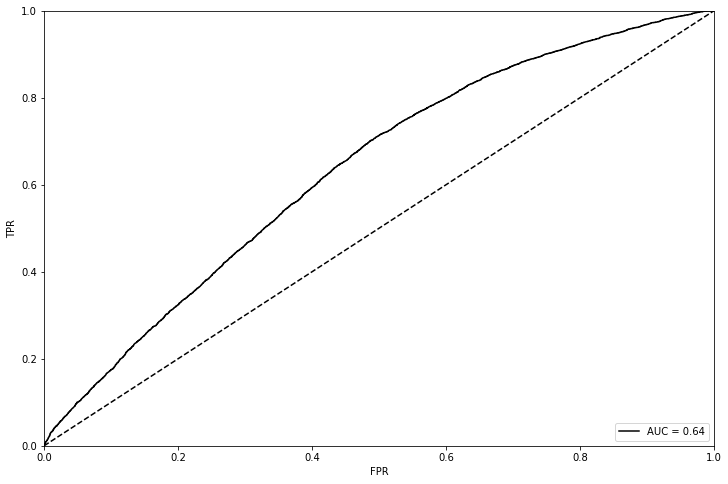

KstestResult(statistic=0.5161716312777048, pvalue=0.0)


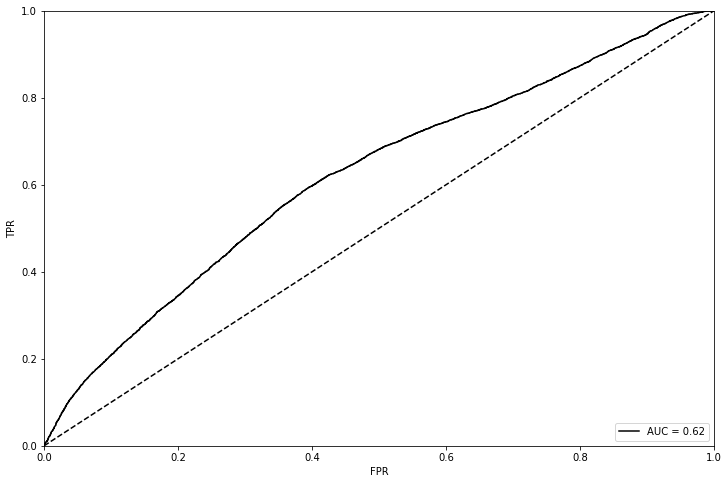

KstestResult(statistic=0.5119755252082491, pvalue=0.0)


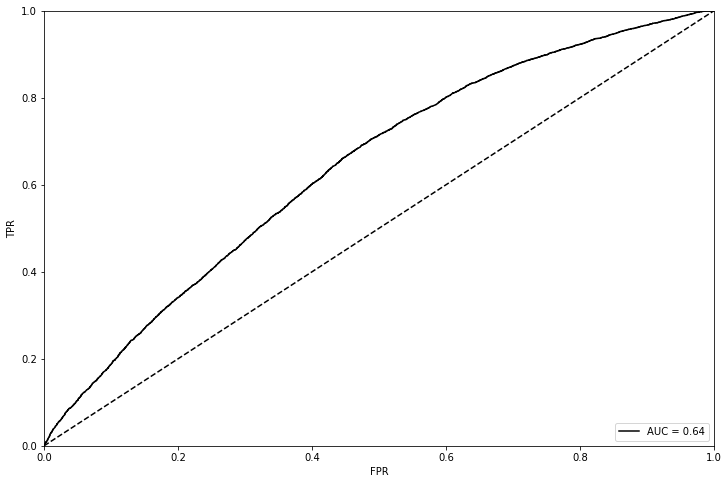

KstestResult(statistic=0.5095348822970669, pvalue=0.0)


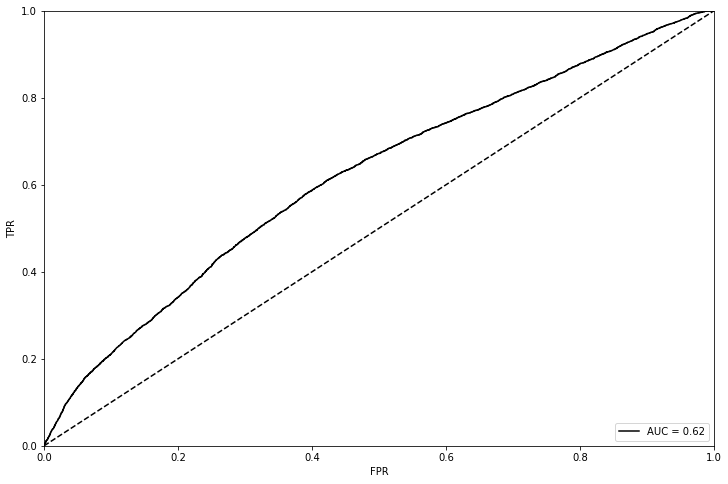

KstestResult(statistic=0.5208052602556101, pvalue=0.0)


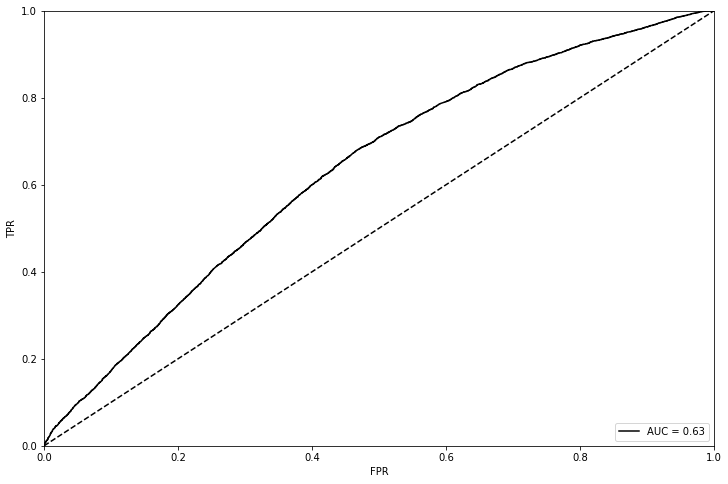

KstestResult(statistic=0.5137734554213581, pvalue=0.0)


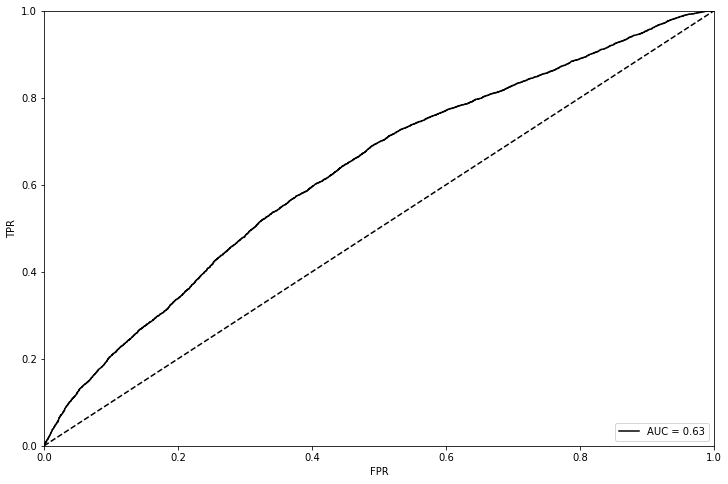

KstestResult(statistic=0.5203840809451479, pvalue=0.0)


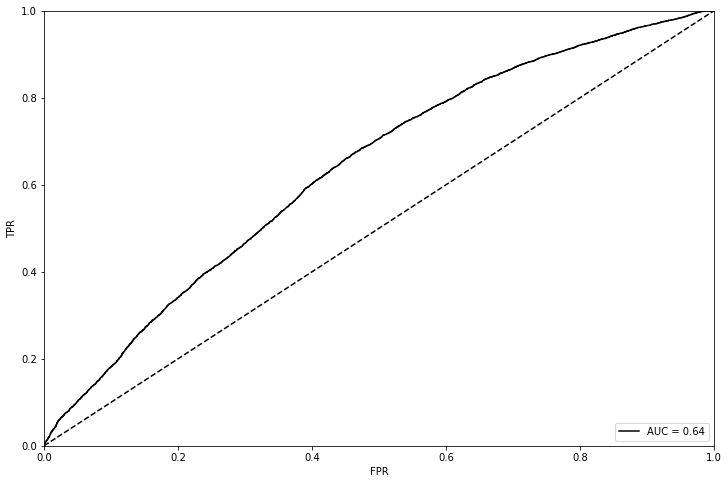

KstestResult(statistic=0.5244033770750045, pvalue=0.0)


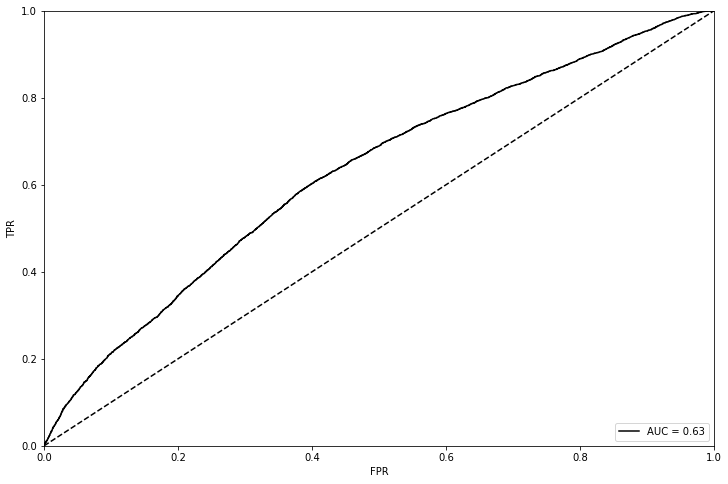

KstestResult(statistic=0.5132196610205887, pvalue=0.0)


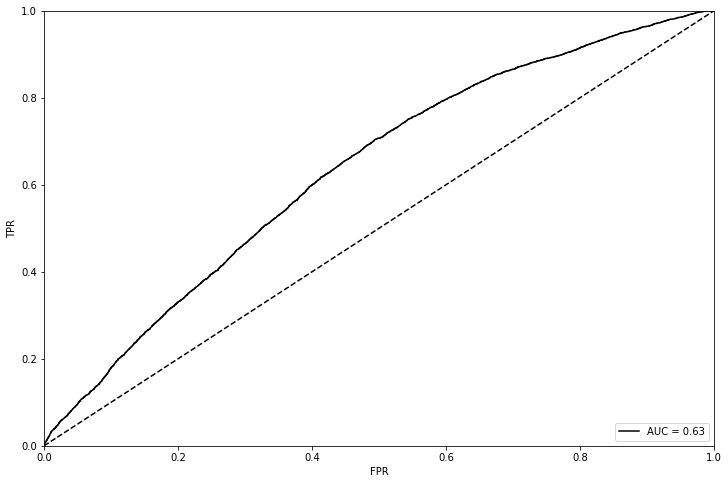

KstestResult(statistic=0.5166248943495539, pvalue=0.0)


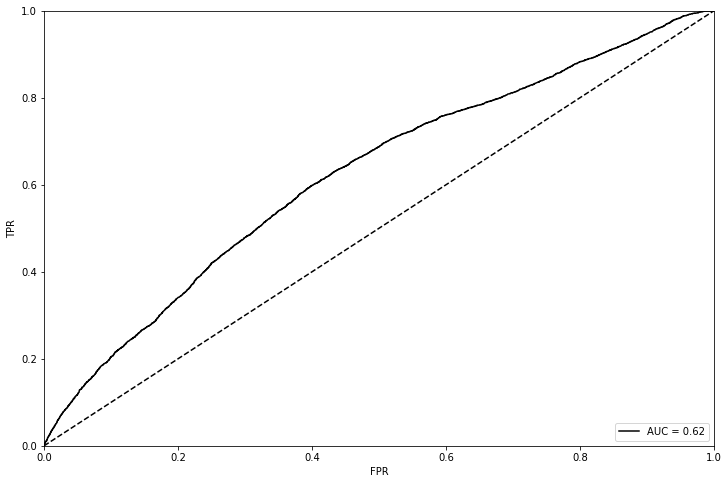

KstestResult(statistic=0.5107161432254655, pvalue=0.0)


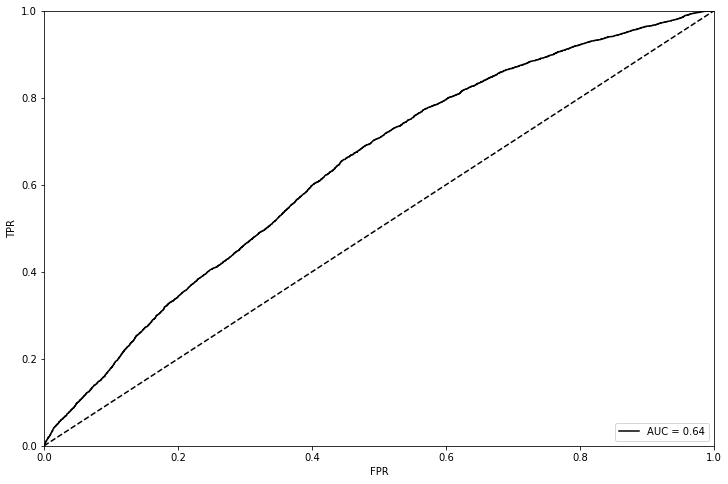

KstestResult(statistic=0.5173497791013854, pvalue=0.0)


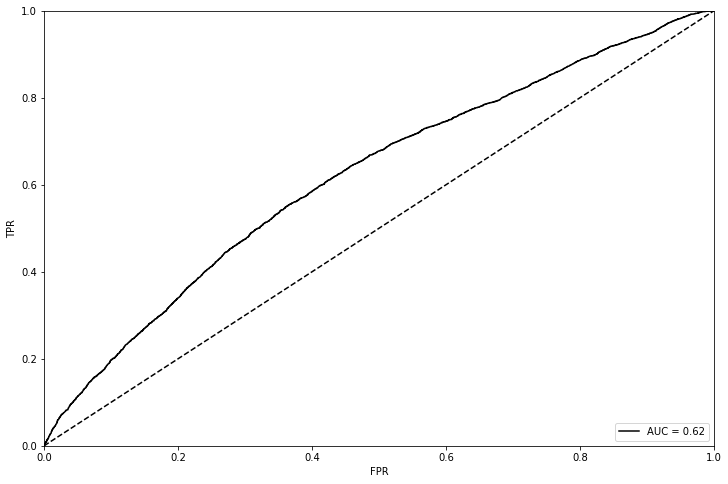

KstestResult(statistic=0.51030584265576, pvalue=0.0)


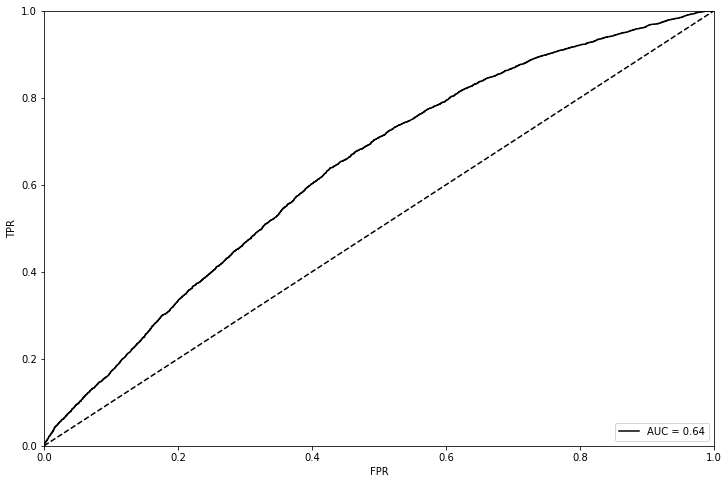

KstestResult(statistic=0.5083122343791497, pvalue=0.0)


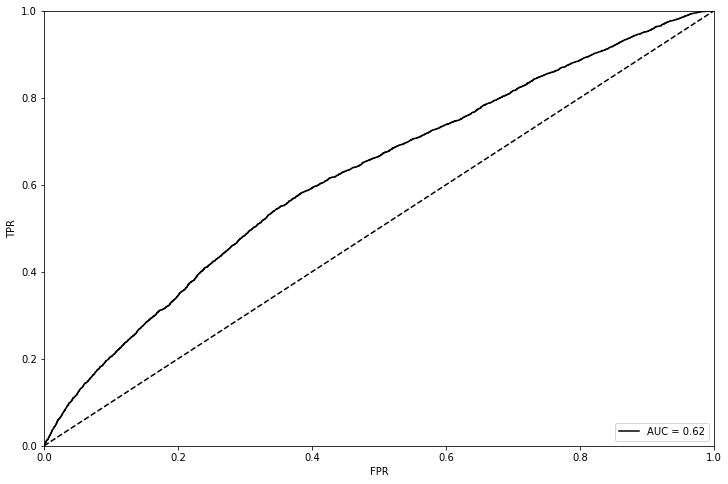

KstestResult(statistic=0.5191211927984684, pvalue=0.0)


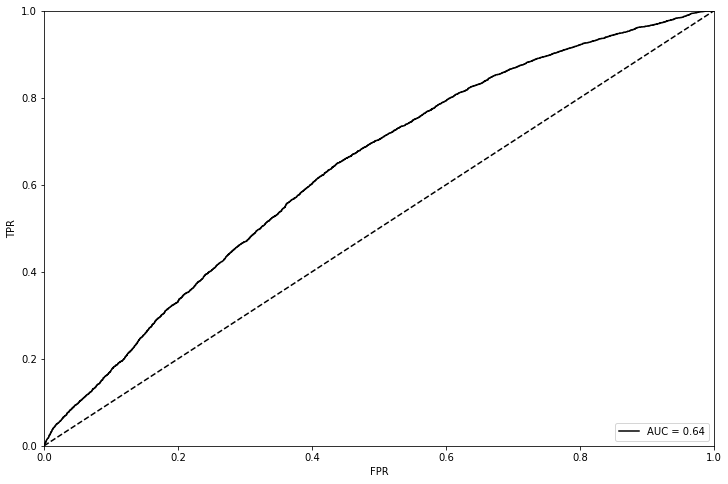

KstestResult(statistic=0.5172817700636889, pvalue=0.0)


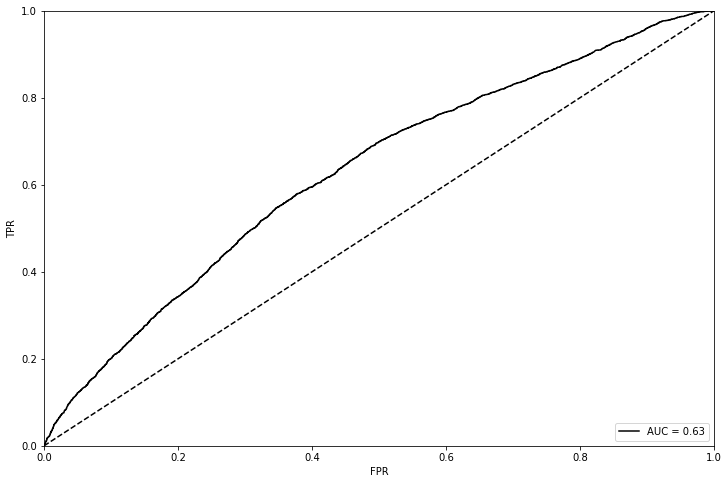

KstestResult(statistic=0.5091777678071169, pvalue=0.0)


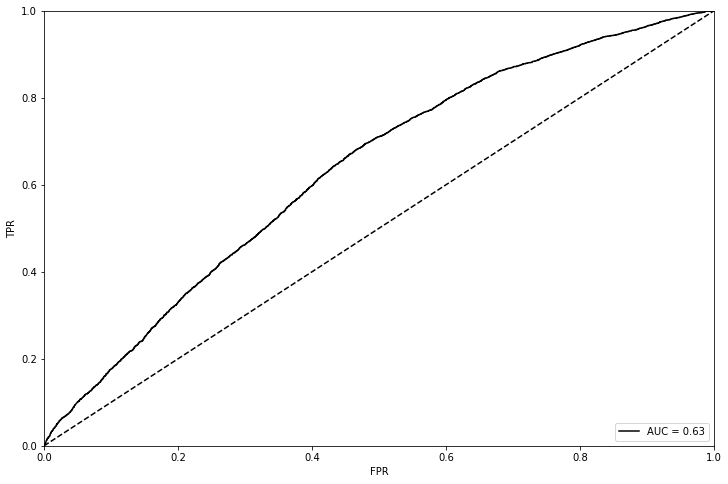

KstestResult(statistic=0.5155946556473283, pvalue=0.0)


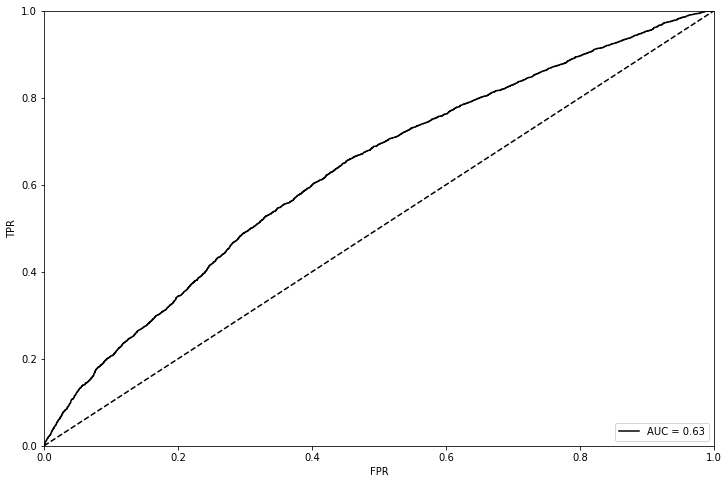

KstestResult(statistic=0.5136186341341985, pvalue=0.0)


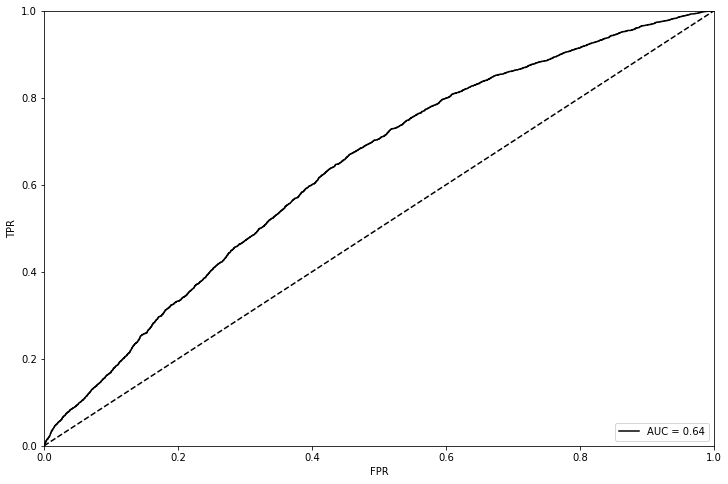

KstestResult(statistic=0.5044813590186757, pvalue=0.0)


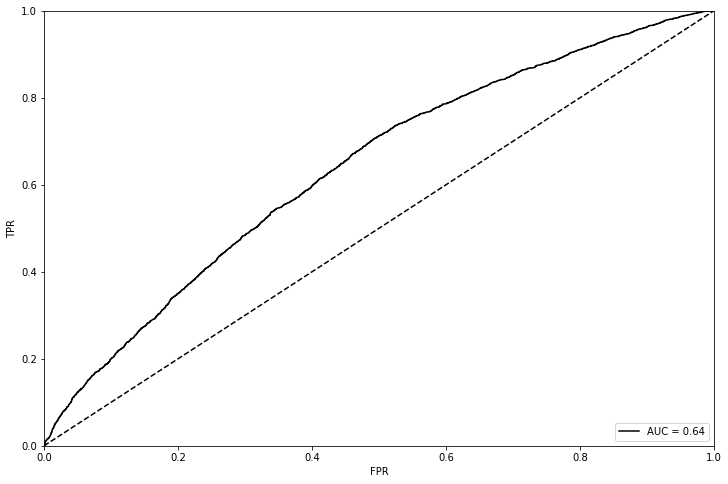

KstestResult(statistic=0.5055679838607474, pvalue=0.0)


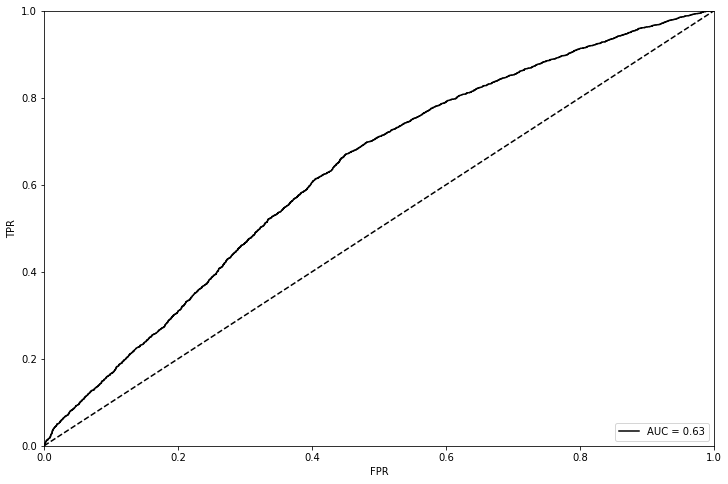

KstestResult(statistic=0.5125813394962377, pvalue=0.0)


In [4]:
data = pd.concat([rep, non_rep], sort=True)
data['preds'] = len(data.label)*[0]

temperature = 1 
n_drop = 200
limit = 10_000

while (len(data[data.label == 1]['preds']) < n_drop or
       len(data.label) > limit):
    
    rf = RandomForestClassifier(n_estimators=500, 
                                bootstrap=True,
                                max_depth=4,
                                oob_score=False)
    
    preds = cross_val_predict(rf,
                              data.drop(['label', 'Above/Below 50K'], axis=1),
                              data['label'], 
                              cv=2,
                              method='predict_proba')
    
    data['preds'] = [p[0] for p in preds] 
    auc = roc(data.label, data.preds, 1, 'name')
    
    drop_id = []
    for _ in range(n_drop):
        softmax = sample(data[data.label == 1]['preds'], temperature)
        drop_id.append(np.argmax(softmax))
    data.drop(data.index[drop_id], inplace=True)

    print(kstest(data.preds, 'uniform'))
    
    #if auc == 0.5 or kstest == 0.0:
    #    break

In [5]:
data

Above/Below 50K Age  Capital Gain  Capital Loss  Country_ ?  \
44              <=50K  25           0.0           0.0           0   
98              <=50K  48           0.0           0.0           0   
106             <=50K  17       34095.0           0.0           0   
114             <=50K  36           0.0           0.0           0   
121             <=50K  40           0.0           0.0           0   
147             <=50K  36           0.0           0.0           0   
152             <=50K  33           0.0           0.0           0   
170             <=50K  27           0.0        1980.0           0   
233             <=50K  33           0.0           0.0           0   
258             <=50K  45           0.0           0.0           0   
339             <=50K  45           0.0           0.0           0   
361              >50K  62           0.0           0.0           0   
372              >50K  40           0.0           0.0           0   
377             <=50K  23           0.0           0.0           0   
379             <=50K  38           0.0           0.0           0   
385             <=50K  23           0.0           0.0           0   
403             <=50K  34           0.0           0.0           0   
407             <=50K  46           0.0           0.0           0   
417             <=50K  30           0.0           0.0           0   
421             <=50K  17        2176.0           0.0           0   
434             <=50K  27           0.0        1980.0           0   
435              >50K  33           0.0           0.0           0   
482             <=50K  28           0.0           0.0           0   
498             <=50K  26           0.0           0.0           0   
500             <=50K  23           0.0           0.0           0   
517             <=50K  20           0.0           0.0           0   
530             <=50K  44           0.0           0.0           0   
562              >50K  47           0.0           0.0           0   
586             <=50K  29           0.0           0.0           0   
597              >50K  42           0.0        1902.0           0   
...               ...  ..           ...           ...         ...   
3663             >50K  59           0.0           0.0           0   
9880             >50K  44           0.0           0.0           0   
12324            >50K  58           0.0        1977.0           0   
22420            >50K  35        7298.0           0.0           0   
2631             >50K  43           0.0           0.0           0   
22516            >50K  40           0.0        1887.0           0   
27300            >50K  28           0.0           0.0           0   
13722            >50K  31           0.0           0.0           0   
3300             >50K  56           0.0           0.0           0   
4374             >50K  38        3103.0           0.0           0   
12600            >50K  48           0.0           0.0           0   
30318            >50K  50        7298.0           0.0           0   
13682            >50K  47           0.0           0.0           0   
18809            >50K  44           0.0           0.0           0   
30138            >50K  47           0.0           0.0           0   
7953             >50K  56        7298.0           0.0           0   
2196             >50K  46        7298.0           0.0           0   
19451            >50K  58           0.0           0.0           0   
6414             >50K  44           0.0           0.0           0   
9275             >50K  39           0.0           0.0           0   
8377             >50K  52           0.0           0.0           0   
9007             >50K  48           0.0           0.0           0   
2719             >50K  52           0.0        1902.0           0   
31831            >50K  27           0.0           0.0           0   
29664            >50K  31       15024.0           0.0           0   
20568            >50K  32           0.0           0.0           0   
1219

In [6]:
data['Above/Below 50K'].value_counts()

 <=50K    6793
 >50K     2754
Name: Above/Below 50K, dtype: int64

## Results

**More/Less than 50K**

**Representative Sample:**
- more: 37155
- less: 11687
- 3.18 : 1


**Non-Representative Sample:**
- more: 21000
- less: 11687
- 1.80 : 1


**MRS corrected Sample:**
- more: 6363
- less: 2542
- 2.50 : 1